In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from joblib import load,dump

import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv(r"I:\Datas\Heart data\Heart data.csv")
df

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1
593,43,1,4,140.0,288.0,0.0,0.0,135.0,1.0,2.0,2.0,NaN,NaN,1
594,41,1,4,120.0,336.0,0.0,0.0,118.0,1.0,3.0,2.0,NaN,NaN,1
595,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1


In [3]:
df.shape

(597, 14)

In [4]:
df.ndim

2

In [5]:
df.columns

Index(['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'c'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (age in year)      597 non-null    int64  
 1   sex                    597 non-null    int64  
 2   chest pain             597 non-null    int64  
 3   blood pressure         596 non-null    float64
 4   cholestoral            574 non-null    float64
 5   blood sugar            589 non-null    float64
 6   electrocardiographic   596 non-null    float64
 7   heart rate             596 non-null    float64
 8   exercise induced       596 non-null    float64
 9   depression             597 non-null    float64
 10  slope                  407 non-null    float64
 11  ca                     303 non-null    float64
 12  thal                   329 non-null    float64
 13  c                      597 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 65.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (age in year),597.0,51.182580,9.074366,28.0,44.0,52.0,58.00,77.0
sex,597.0,0.701843,0.457833,0.0,0.0,1.0,1.00,1.0
chest pain,597.0,3.072027,0.965776,1.0,2.0,3.0,4.00,4.0
blood pressure,596.0,132.129195,17.603812,92.0,120.0,130.0,140.00,200.0
cholestoral,574.0,248.655052,59.784805,85.0,211.0,242.5,278.75,603.0
blood sugar,589.0,0.110357,0.313600,0.0,0.0,0.0,0.00,1.0
electrocardiographic,596.0,0.610738,0.869358,0.0,0.0,0.0,2.00,2.0
heart rate,596.0,144.456376,23.794282,71.0,128.0,146.0,162.00,202.0
exercise induced,596.0,0.315436,0.465080,0.0,0.0,0.0,1.00,1.0
depression,597.0,0.816248,1.067938,0.0,0.0,0.2,1.50,6.2


In [8]:
df.rename(columns={"Age (age in year)":"age",
                     "cholestoral ":"cholestoral",
                     "electrocardiographic ":"electrocardiographic",
                      "depression ":"depression "},inplace=True)
df

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1
593,43,1,4,140.0,288.0,0.0,0.0,135.0,1.0,2.0,2.0,NaN,NaN,1
594,41,1,4,120.0,336.0,0.0,0.0,118.0,1.0,3.0,2.0,NaN,NaN,1
595,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1


# Noise Detection and Managment

In [9]:
df[df['ca']==9]
df[df['ca']==9]['ca']=np.nan

# Missing detection

In [10]:
df.isnull().sum()

age                       0
sex                       0
chest pain                0
blood pressure            1
cholestoral              23
blood sugar               8
electrocardiographic      1
heart rate                1
exercise induced          1
depression                0
slope                   190
ca                      294
thal                    268
c                         0
dtype: int64

In [11]:
df.dropna(thresh=450 , inplace=True, axis=1)
df

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2.0,1
593,43,1,4,140.0,288.0,0.0,0.0,135.0,1.0,2.0,1
594,41,1,4,120.0,336.0,0.0,0.0,118.0,1.0,3.0,1
595,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,1


In [12]:
df.shape

(597, 11)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain'}>],
       [<Axes: title={'center': 'blood pressure'}>,
        <Axes: title={'center': 'cholestoral'}>,
        <Axes: title={'center': 'blood sugar'}>],
       [<Axes: title={'center': 'electrocardiographic'}>,
        <Axes: title={'center': 'heart rate'}>,
        <Axes: title={'center': 'exercise induced'}>],
       [<Axes: title={'center': 'depression '}>,
        <Axes: title={'center': 'c'}>, <Axes: >]], dtype=object)

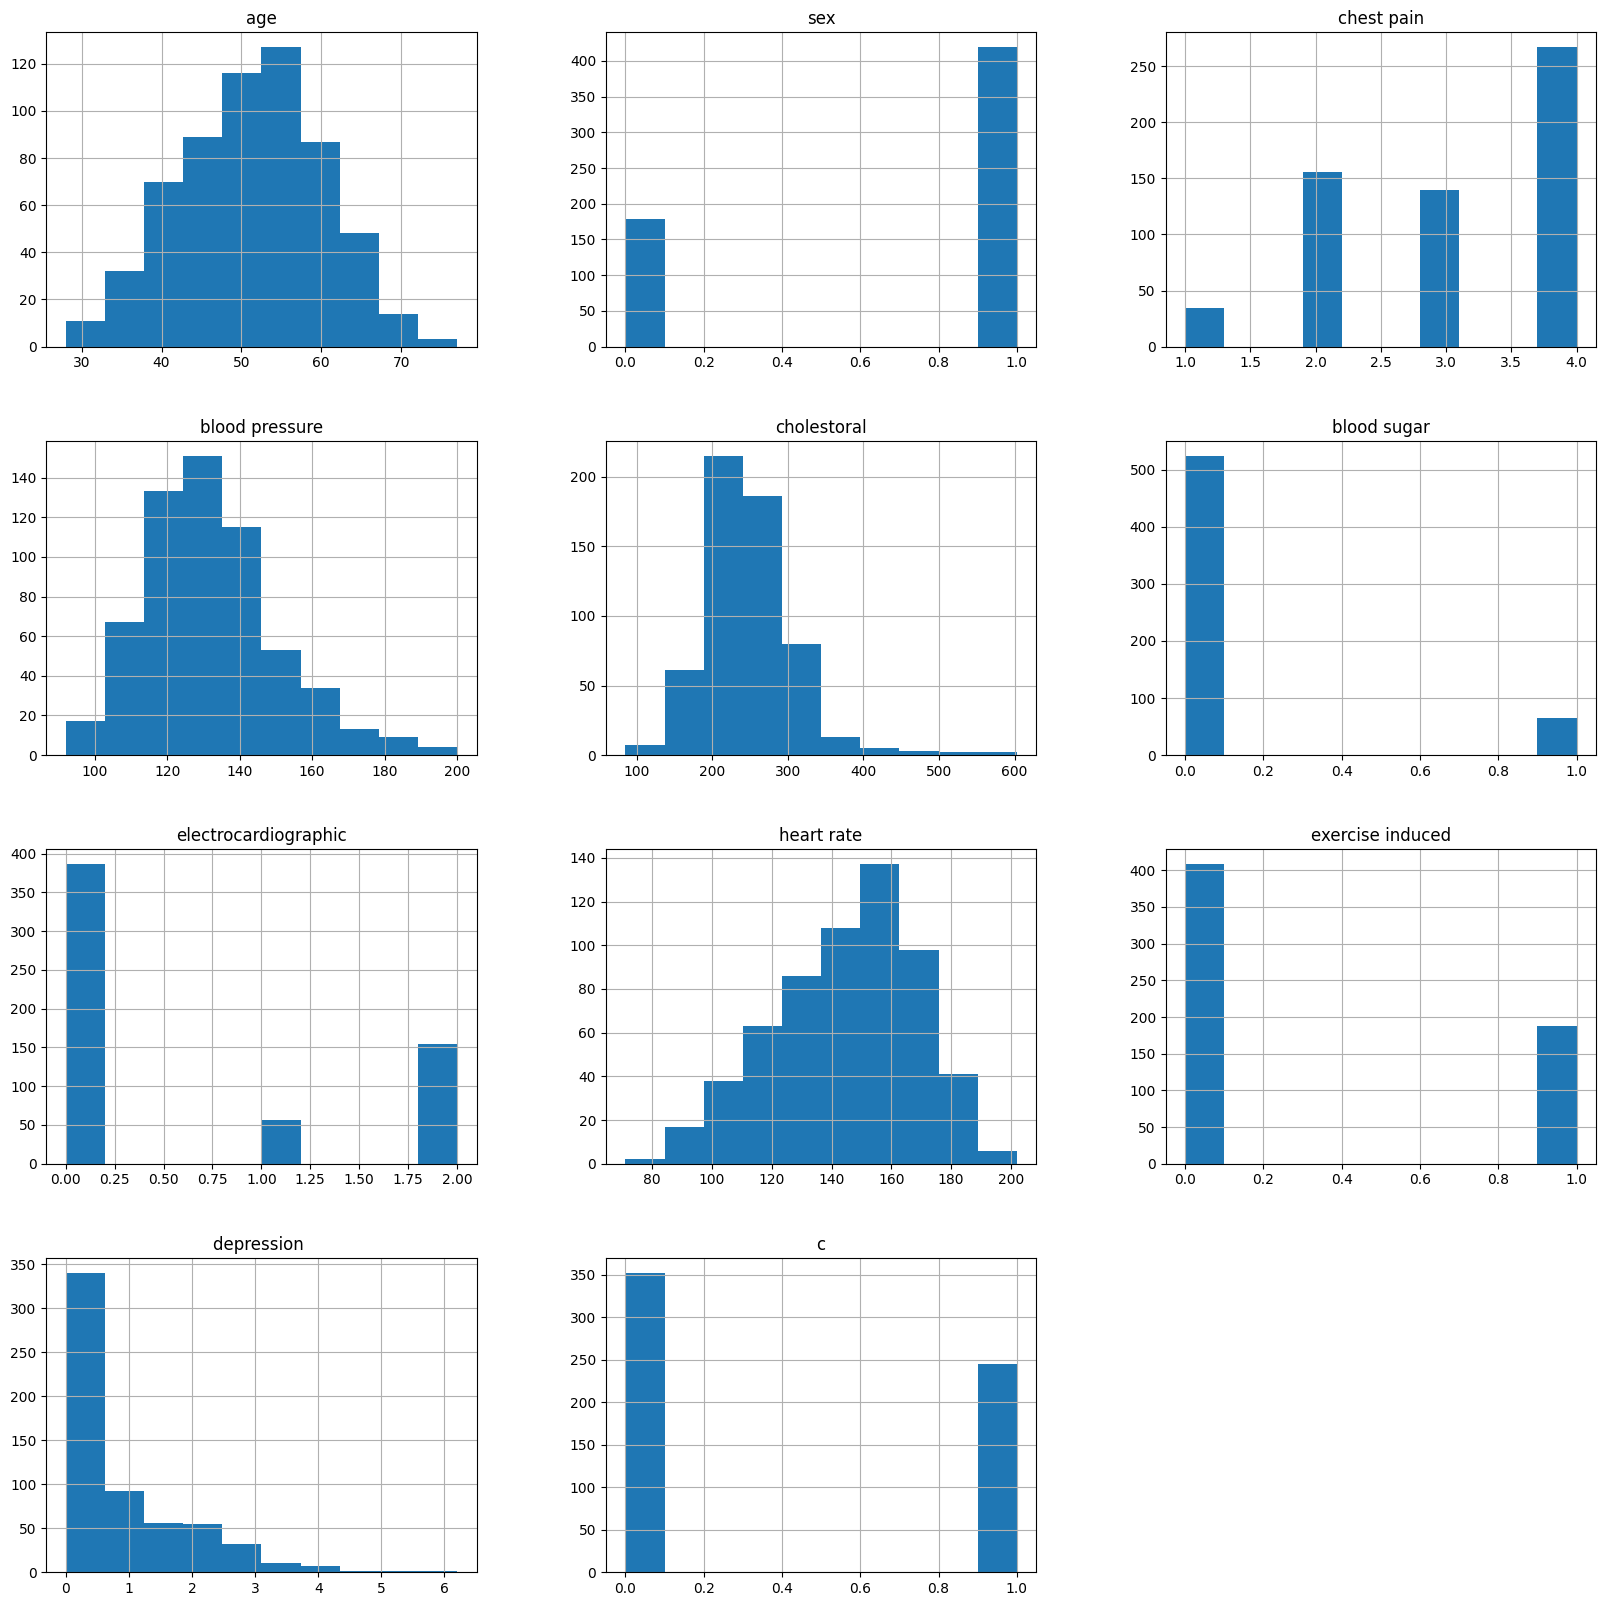

In [13]:
df.hist(figsize=(20,20))

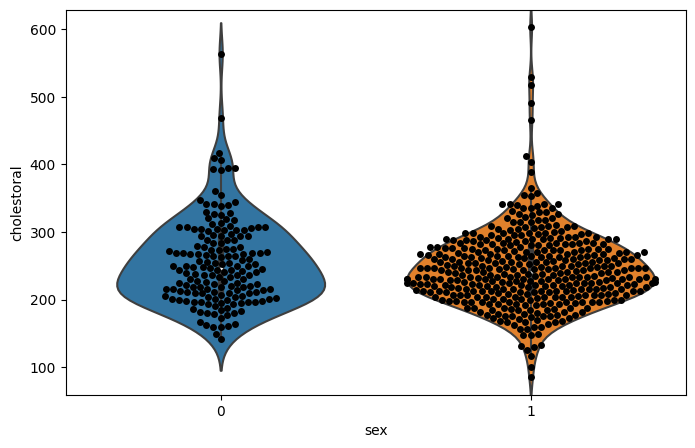

In [14]:
plt.figure(figsize=(8,5) )
ax = sns.violinplot(x="sex", y="cholestoral", data=df)
ax = sns.swarmplot(x="sex", y="cholestoral", data=df, color="black", edgecolor="red", s=5)

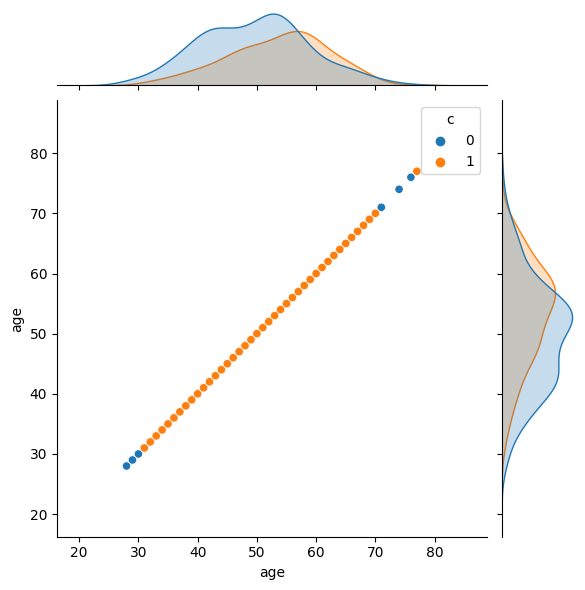

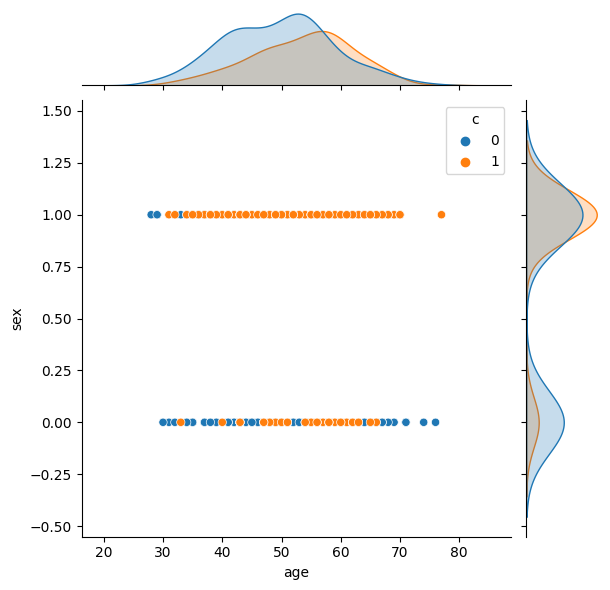

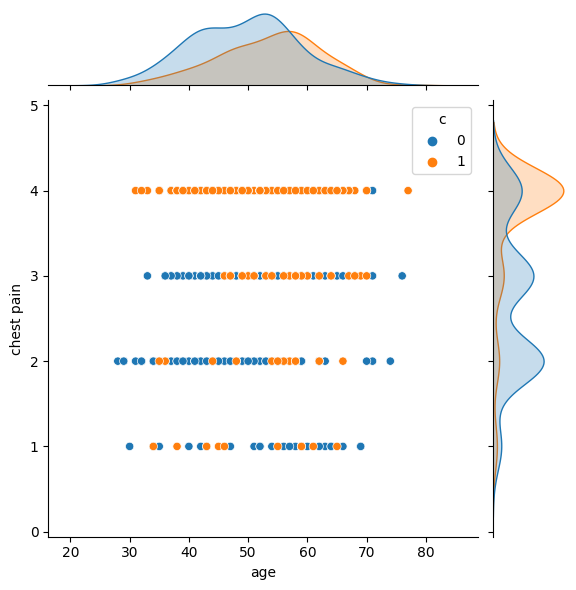

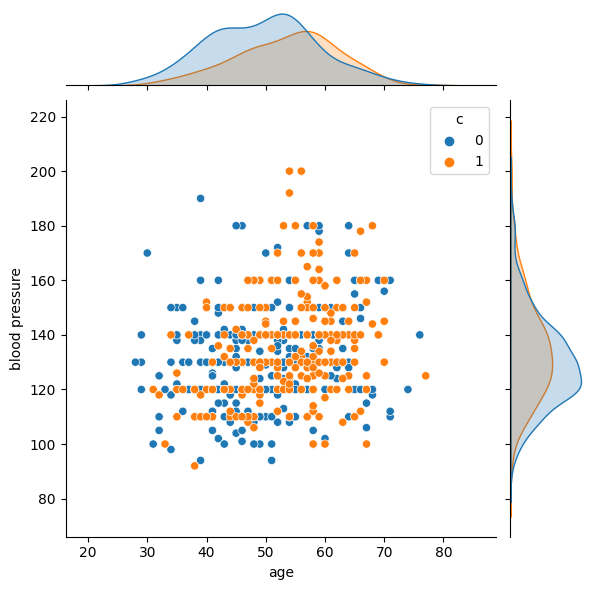

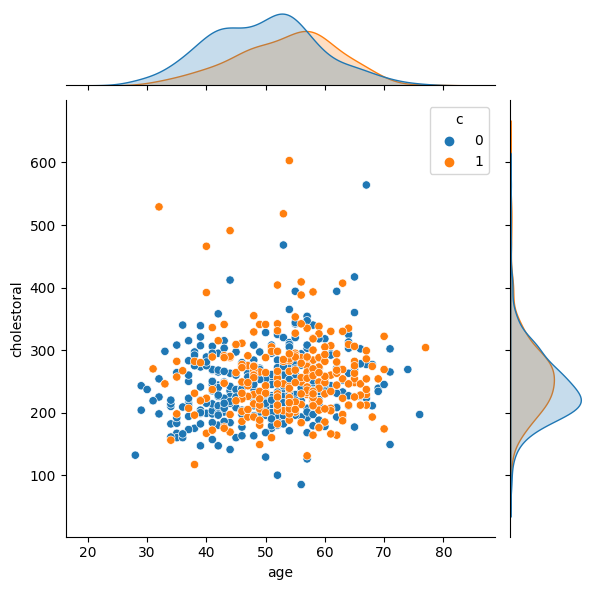

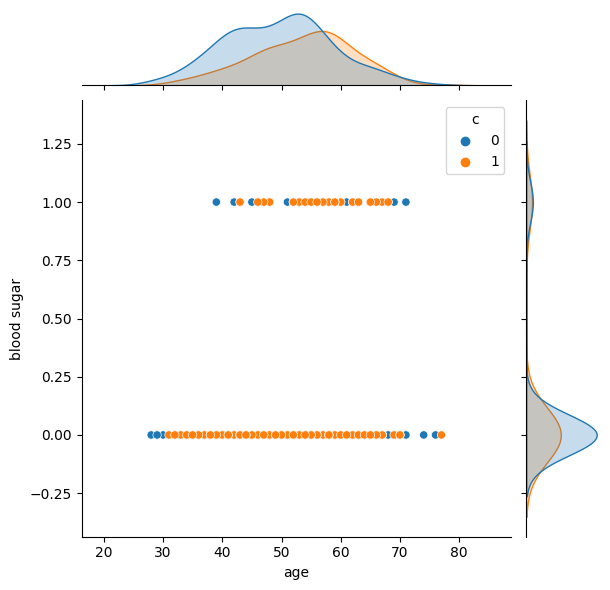

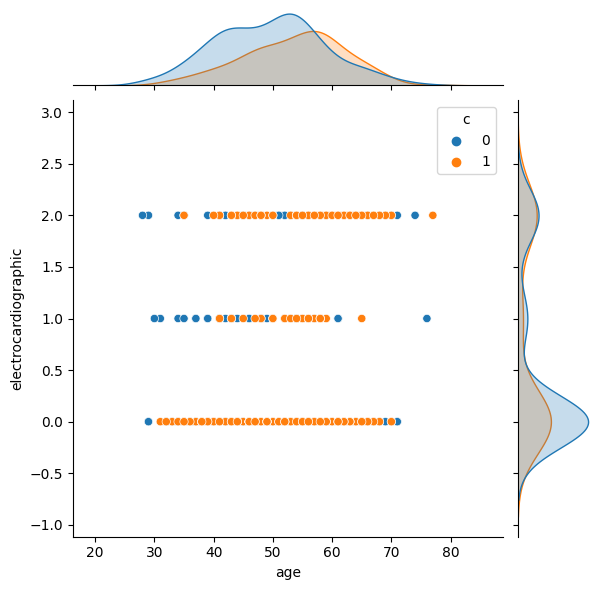

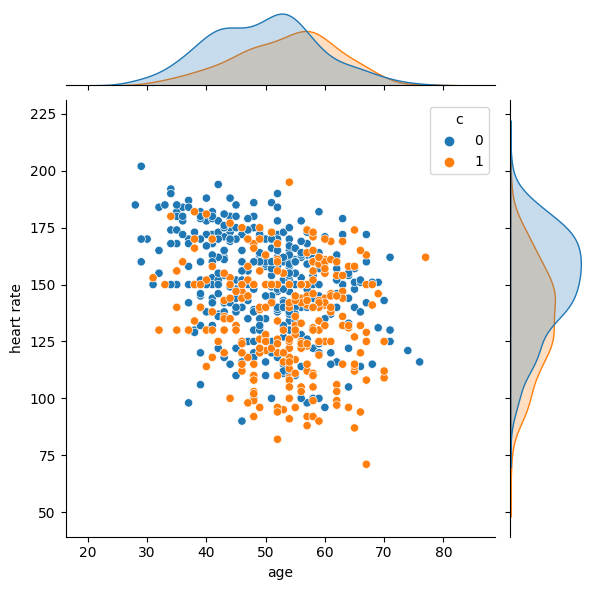

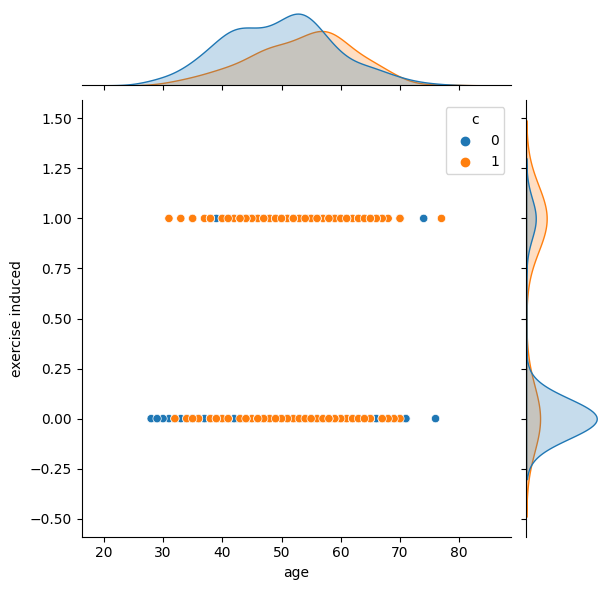

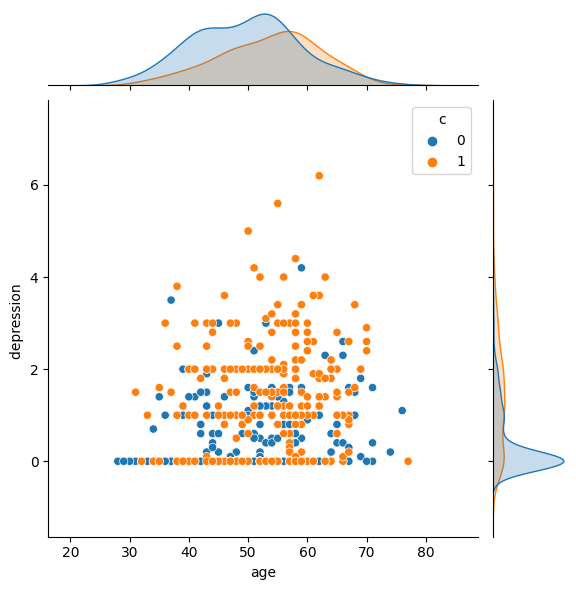

In [15]:
#jointplpt
f_name = df.drop('c', axis=1)
for col in f_name:
 sns.jointplot(data= df , y=df[str(col)] , x='age' , hue='c')

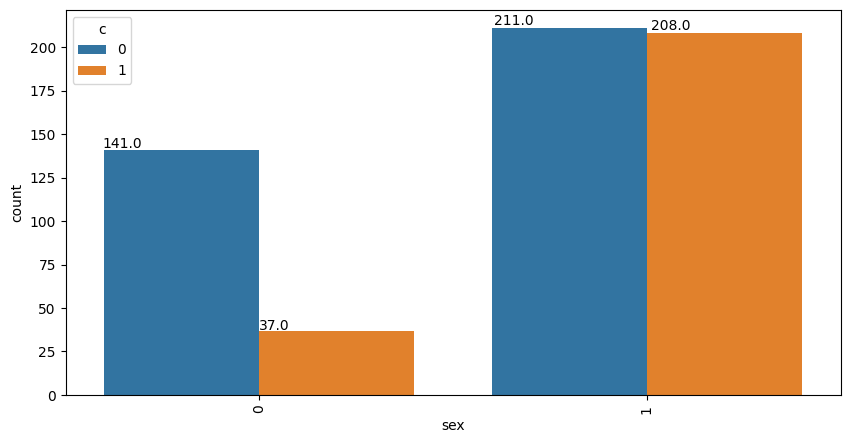

In [16]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "sex", hue = "c", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

## use pointbiserial to know the P_value and corr() all featurs with Target

In [17]:
from scipy.stats import pointbiserialr
df3 = df.dropna()

for  i in df3.columns:
    correlation, p_value = pointbiserialr(df3[i].dropna(), df3['c'])

    print("Correlation of {} is {}:".format(i,correlation))
    print("p_value of {} is {}:".format(i,p_value))
    print("*******************************")

Correlation of age is 0.2128668780275449:
p_value of age is 3.348627362647905e-07:
*******************************
Correlation of sex is 0.2581768572506445:
p_value of sex is 4.859571540411177e-10:
*******************************
Correlation of chest pain is 0.45871295854681876:
p_value of chest pain is 1.074444474811825e-30:
*******************************
Correlation of blood pressure is 0.14680162614970169:
p_value of blood pressure is 0.0004695047999688249:
*******************************
Correlation of cholestoral is 0.1500857193355054:
p_value of cholestoral is 0.0003479464165914726:
*******************************
Correlation of blood sugar is 0.09180856160876716:
p_value of blood sugar is 0.02924995748586376:
*******************************
Correlation of electrocardiographic is 0.13502455418789394:
p_value of electrocardiographic is 0.0013077549934134667:
*******************************
Correlation of heart rate is -0.35466057838893855:
p_value of heart rate is 3.6874017059498

# Features Distribution is normal or not

# shapiro Test

In [18]:
normal_feature = []
for c in df.columns:

    data_column = df[c].dropna()
    statistic, p_value = stats.shapiro(data_column)
    print(f"Shapiro-Wilk test for column '{c}':")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print("\n")
    alpha = 0.02
    if p_value > alpha:
        normal_feature.append(c)

print("The Normal Distribution columns are{}".format(normal_feature))

Shapiro-Wilk test for column 'age':
Statistic: 0.9943056106567383
p-value: 0.024840451776981354


Shapiro-Wilk test for column 'sex':
Statistic: 0.5743825435638428
p-value: 1.0817707025139917e-35


Shapiro-Wilk test for column 'chest pain':
Statistic: 0.8063505291938782
p-value: 4.0046705661331414e-26


Shapiro-Wilk test for column 'blood pressure':
Statistic: 0.95993971824646
p-value: 1.1520399217923583e-11


Shapiro-Wilk test for column 'cholestoral':
Statistic: 0.9230440855026245
p-value: 1.5287286366248075e-16


Shapiro-Wilk test for column 'blood sugar':
Statistic: 0.36164623498916626
p-value: 5.195874575869989e-41


Shapiro-Wilk test for column 'electrocardiographic':
Statistic: 0.6393717527389526
p-value: 1.5912676210630922e-33


Shapiro-Wilk test for column 'heart rate':
Statistic: 0.9860541820526123
p-value: 1.822593367251102e-05


Shapiro-Wilk test for column 'exercise induced':
Statistic: 0.5849994421005249
p-value: 2.455853358819981e-35


Shapiro-Wilk test for column 'depre

# Histogram and qq plot to check the Normal Distribution


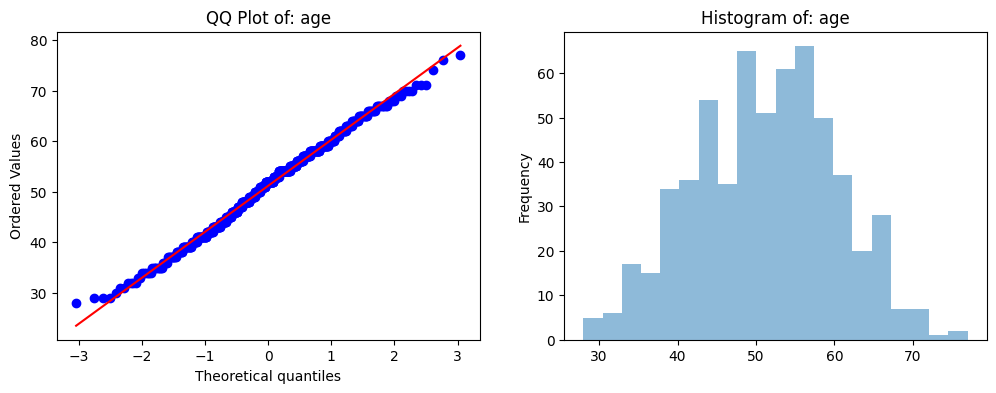

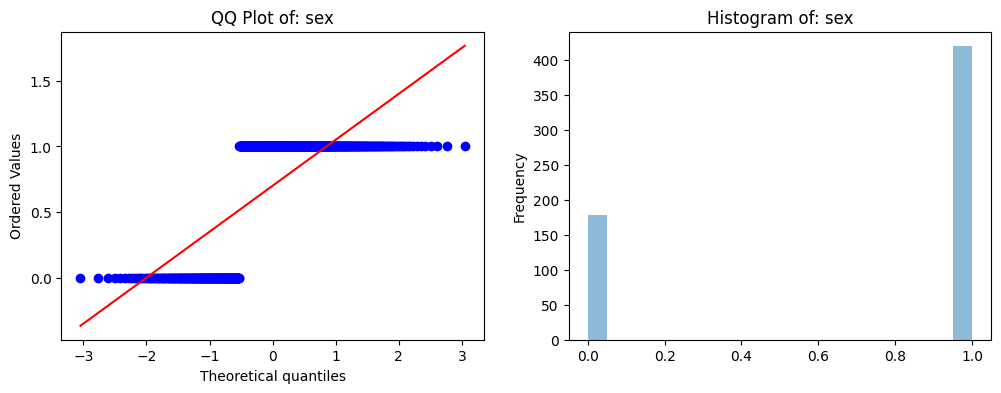

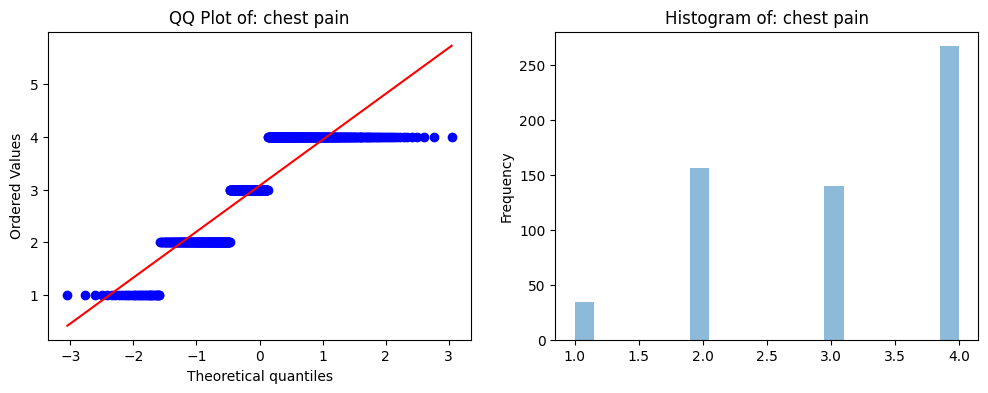

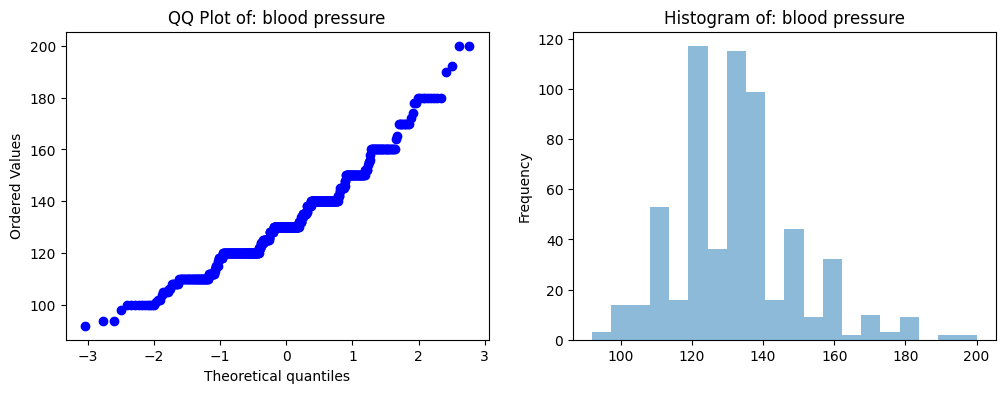

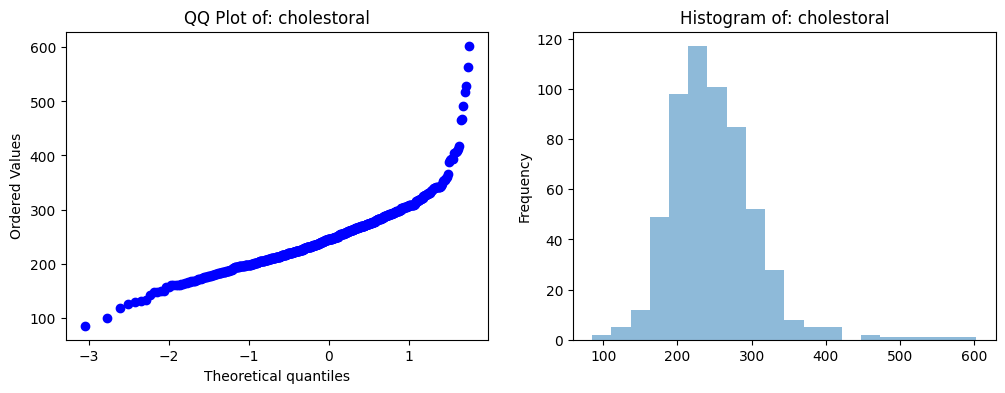

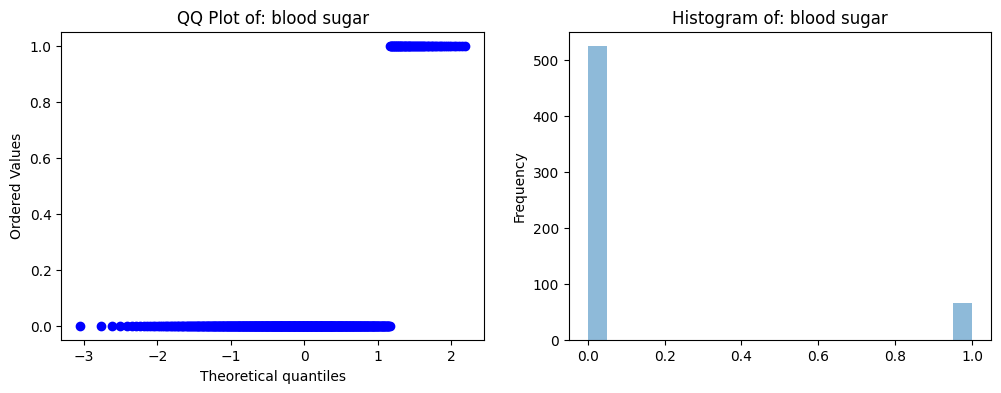

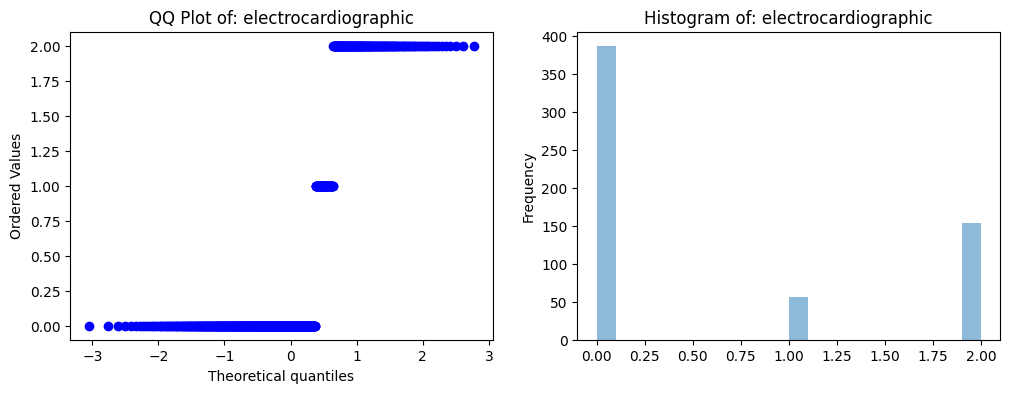

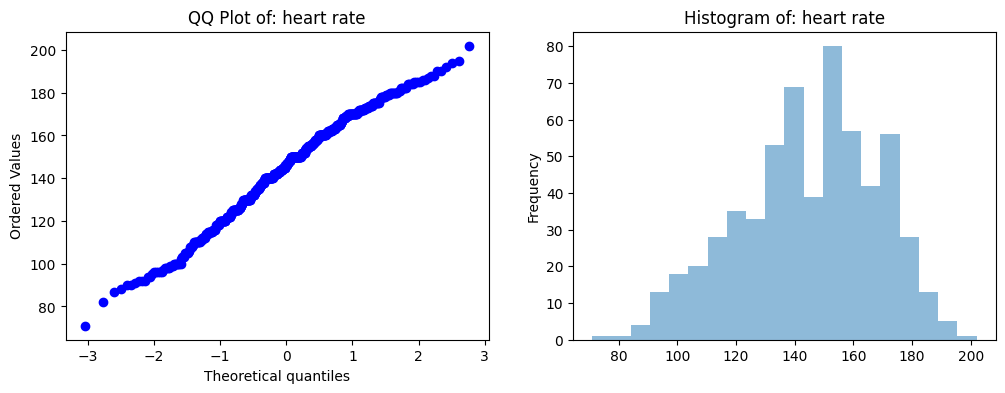

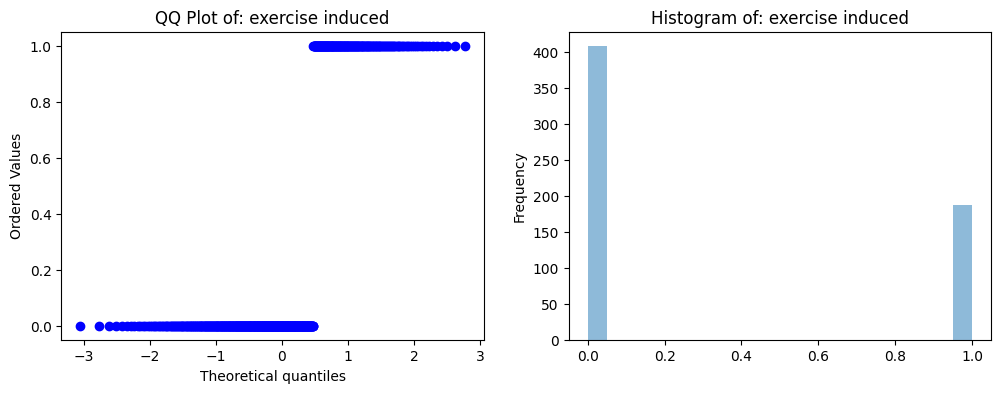

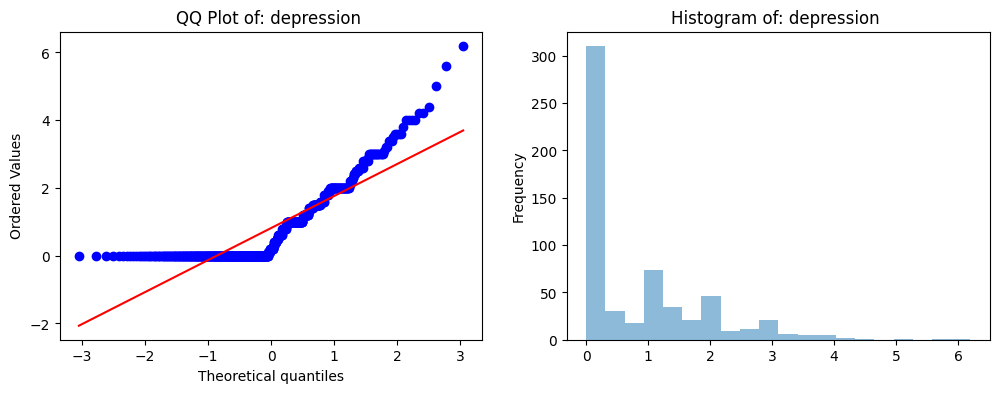

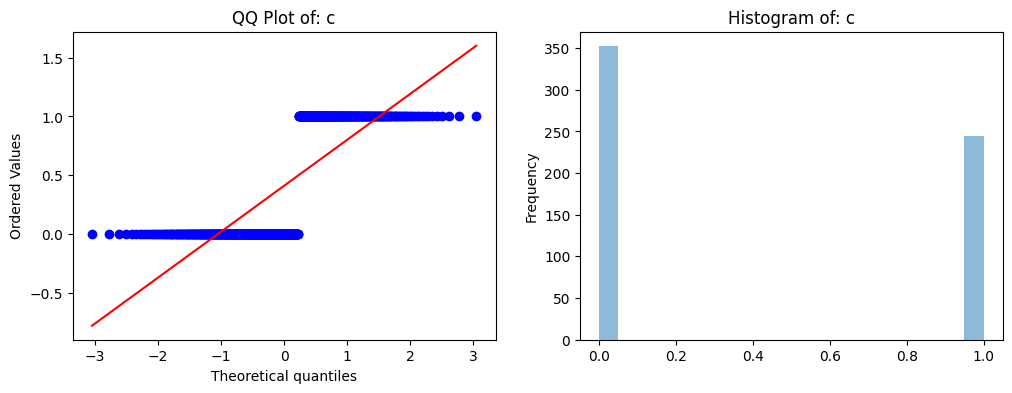

In [19]:
# Iterate over each column in the DataFrame
for col in df.columns:
    # Create subplots for QQ plot and histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot QQ plot
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=axes[0])
    axes[0].set_title('QQ Plot of: {}'.format(col))

    # Plot histogram
    plt.subplot(122)
    df[col].plot(kind='hist', bins=20, alpha=0.5, ax=axes[1])
    axes[1].set_title('Histogram of: {}'.format(col))



# Show Kurtesis and Skewness of each columns

In [20]:
for c in df.columns:
    print("The Column {} skewness is:{},kurtosis is:{} ".format(c,df[c].skew(),df[c].kurtosis()))

The Column age skewness is:-0.05720393335880286,kurtosis is:-0.4077140105911945 
The Column sex skewness is:-0.8846945657997439,kurtosis is:-1.221418644956575 
The Column chest pain skewness is:-0.5257967958771688,kurtosis is:-1.0071378883830135 
The Column blood pressure skewness is:0.7195066225793251,kurtosis is:0.8292304104883095 
The Column cholestoral skewness is:1.3902540786875608,kurtosis is:5.108562042804049 
The Column blood sugar skewness is:2.493437994645069,kurtosis is:4.231590294092626 
The Column electrocardiographic skewness is:0.8425834832965967,kurtosis is:-1.1467480447837592 
The Column heart rate skewness is:-0.3027329779264844,kurtosis is:-0.48306978341385776 
The Column exercise induced skewness is:0.7963589079910572,kurtosis is:-1.3704225286604825 
The Column depression  skewness is:1.4373665179214414,kurtosis is:2.0921995508597697 
The Column c skewness is:0.3652773416021,kurtosis is:-1.872857971996354 


### Function of zScore and IQR to detect outliers:


In [21]:
###################### z_score Function #################
def zscore(df):
    out_z = []
    miu = np.mean(df)
    sig = np.std(df)
    for i in df:
        z = (i - miu)/sig
        if np.abs(z) > 3:
            out_z.append(i)
    return out_z , len(out_z)


#####################Iqr Function ######################
def iqr(df):   
    out_iqr = []
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    iqr = q3 - q1
    upper_band = q3 + 1.5 * iqr
    lower_band = q1 - 1.5 * iqr   
    for i in df:
        if (i > upper_band) or (i< lower_band) :
            out_iqr.append(i)
    return out_iqr, len(out_iqr)

#####################capping Function ######################
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        lower_bound = df[col].quantile(from_low_end)
        upper_bound = df[col].quantile(1-from_high_end)
        df[col] = np.where(df[col]>upper_bound, upper_bound, np.where(df[col]<lower_bound, lower_bound, df[col]))
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end))
#         return df_wins['total day minutes'].describe()

0    352
1    245
Name: c, dtype: int64


<Axes: xlabel='c', ylabel='count'>

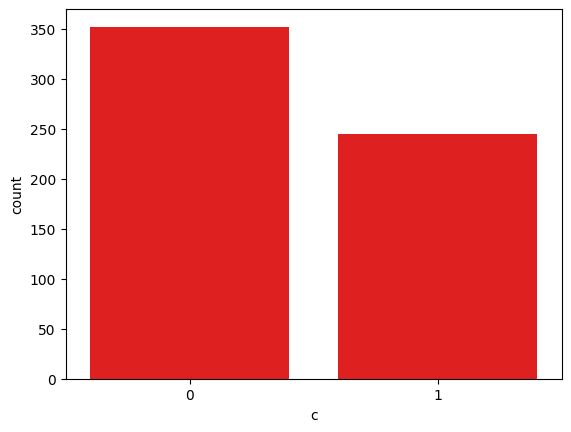

In [22]:
X = df.drop(['c'],axis= 1 )
y = df.c
print( df.loc[:, 'c'].value_counts())

sns.countplot(data=df,x='c',color='red')

# Outliers detection

In [23]:
outlier = []

for c in df.columns:
    _, len_outlier = iqr(df[c])
    _, len_outlier_z_score = zscore(df[c])
    
    if len_outlier !=0:
        outlier.append(c)
    print("IQR ->", c,": " , len_outlier)
    print("Z-score ->",c,": " , len_outlier_z_score)
    print("*****************")

IQR -> age :  0
Z-score -> age :  0
*****************
IQR -> sex :  0
Z-score -> sex :  0
*****************
IQR -> chest pain :  0
Z-score -> chest pain :  0
*****************
IQR -> blood pressure :  17
Z-score -> blood pressure :  4
*****************
IQR -> cholestoral :  19
Z-score -> cholestoral :  7
*****************
IQR -> blood sugar :  65
Z-score -> blood sugar :  0
*****************
IQR -> electrocardiographic :  0
Z-score -> electrocardiographic :  0
*****************
IQR -> heart rate :  1
Z-score -> heart rate :  1
*****************
IQR -> exercise induced :  0
Z-score -> exercise induced :  0
*****************
IQR -> depression  :  11
Z-score -> depression  :  6
*****************
IQR -> c :  0
Z-score -> c :  0
*****************


In [24]:
goal_feature = []

for i  in df.columns:
    if len(df[i].unique())> 6:
        goal_feature.append(i)
print('golden Features are: {}'.format(goal_feature))

golden Features are: ['age', 'blood pressure', 'cholestoral', 'heart rate', 'depression ']


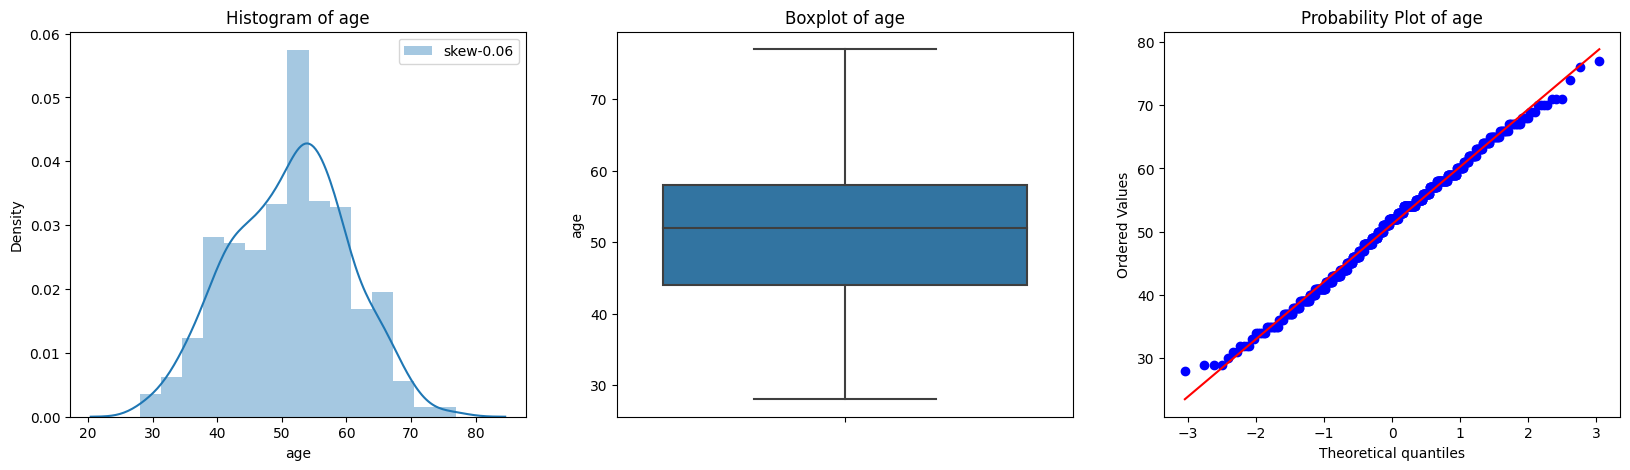

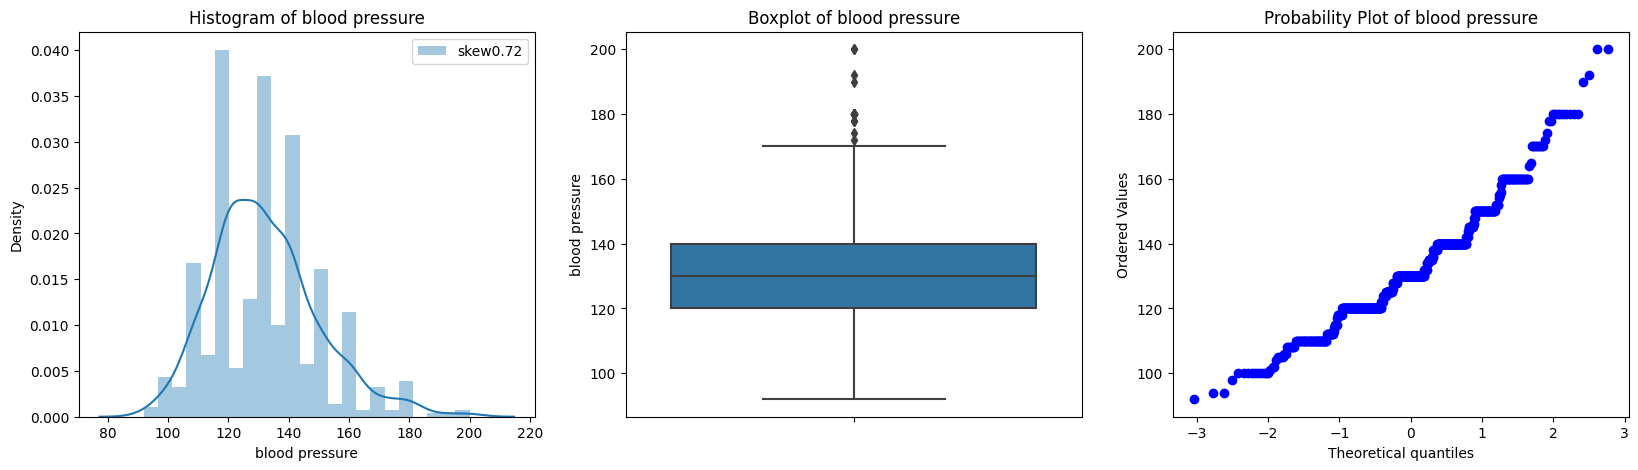

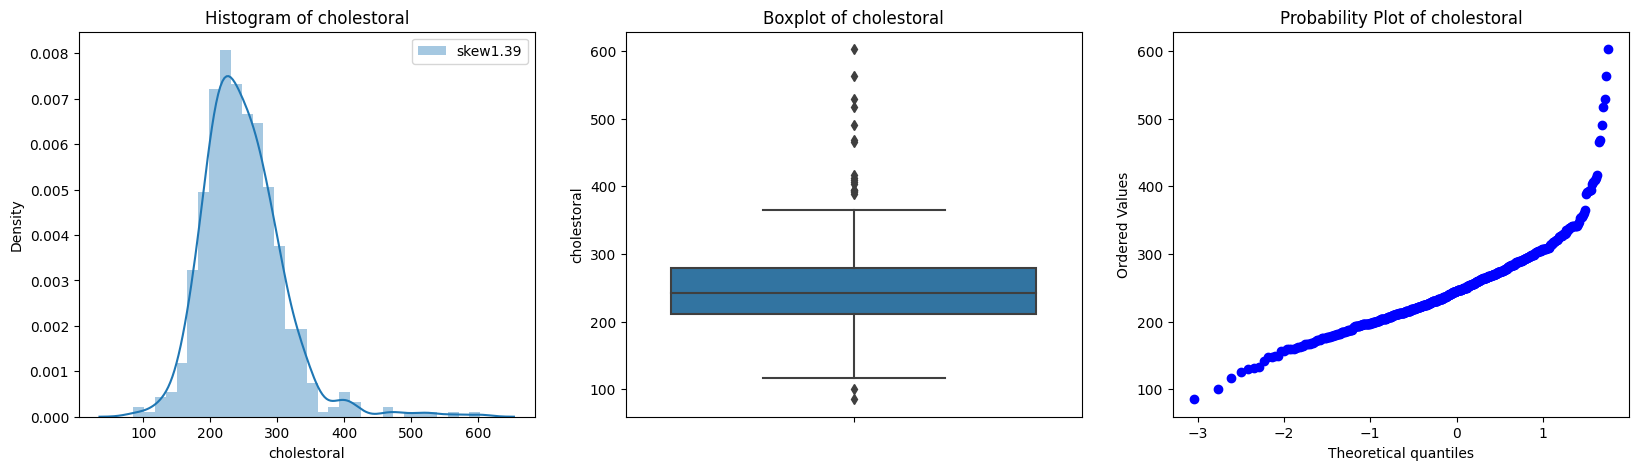

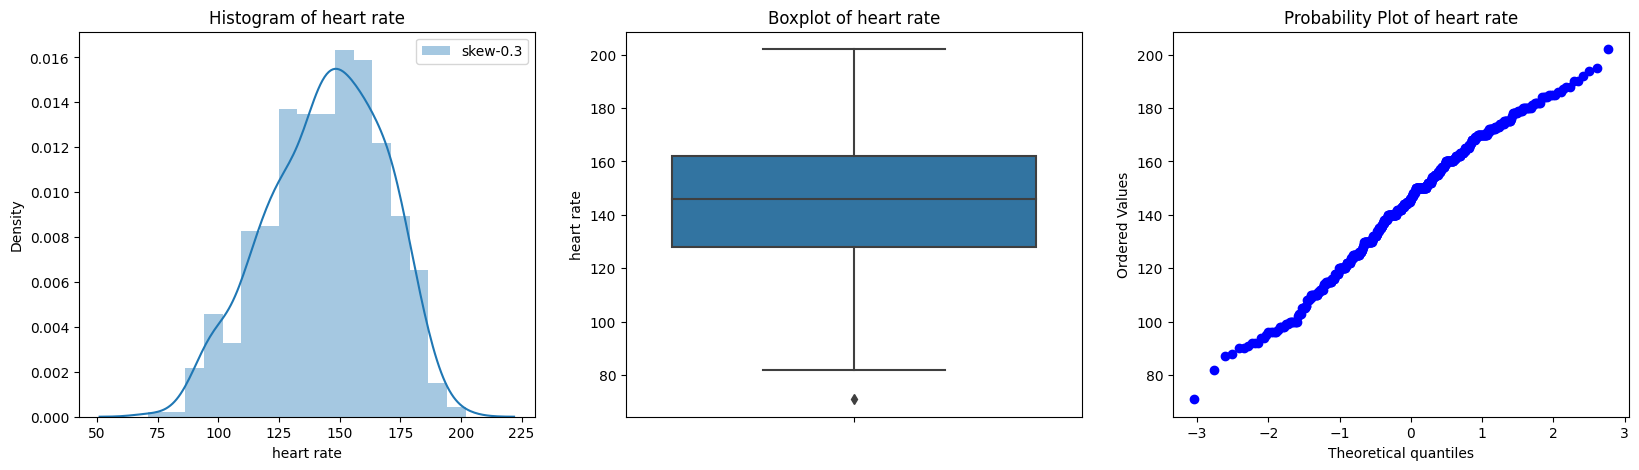

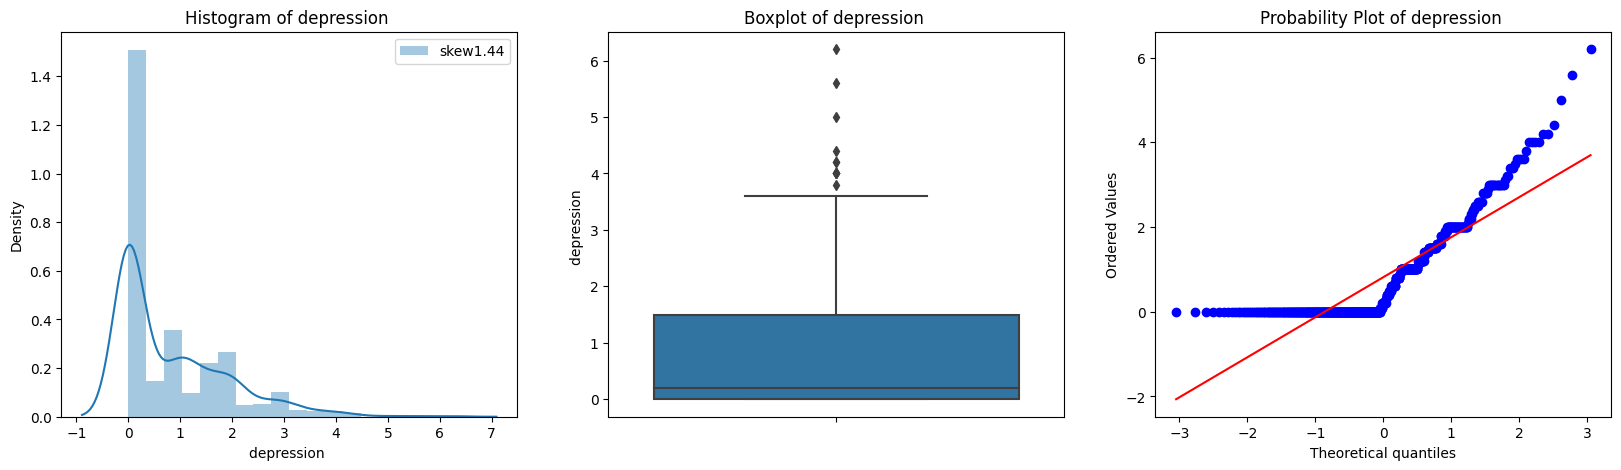

In [25]:
for c in goal_feature:
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    sns.distplot(df[c], label="skew" + str(np.round(df[c].skew(),2)))
    plt.title(f"Histogram of {c}")
    plt.legend()

    
    # Plotting boxplot
    plt.subplot(132)
    sns.boxplot(data=df, y=c)
    plt.title(f"Boxplot of {c}")
    
    # Plotting probability plot
    plt.subplot(133)
    stats.probplot(df[c], dist="norm", plot=plt)
    plt.title(f"Probability Plot of {c}")
    

In [26]:
df1 = df.copy()

# outliers Mangement with Winsor(Capping) 
### limit 0.01

In [27]:
percentile_capping(df,goal_feature,0.01,0.01)

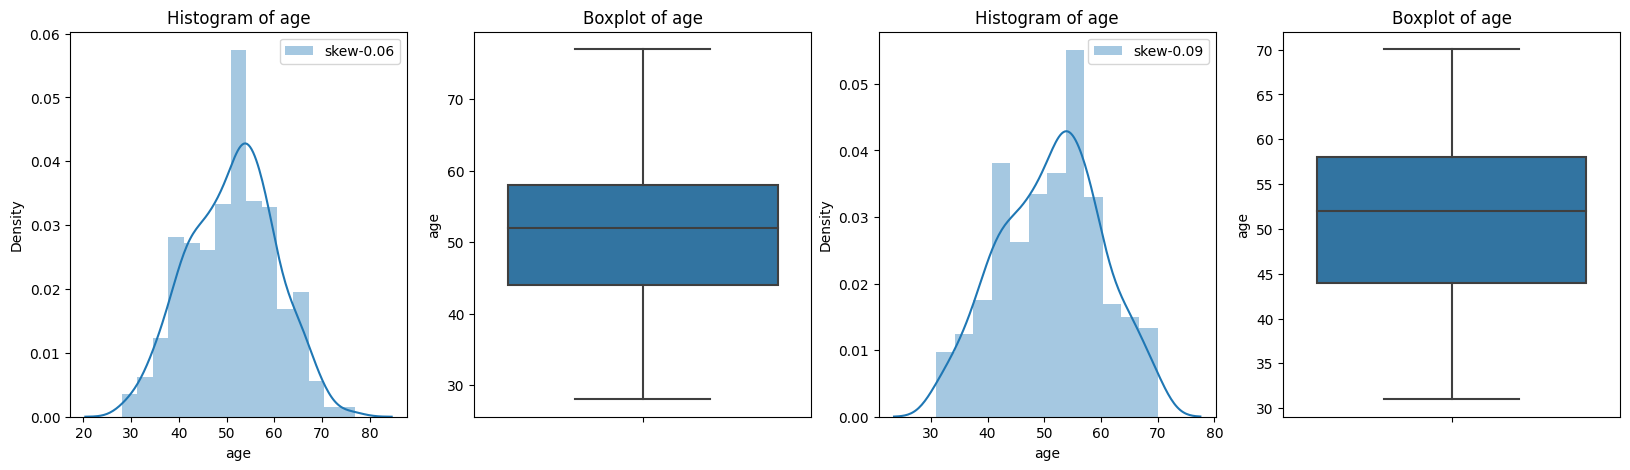

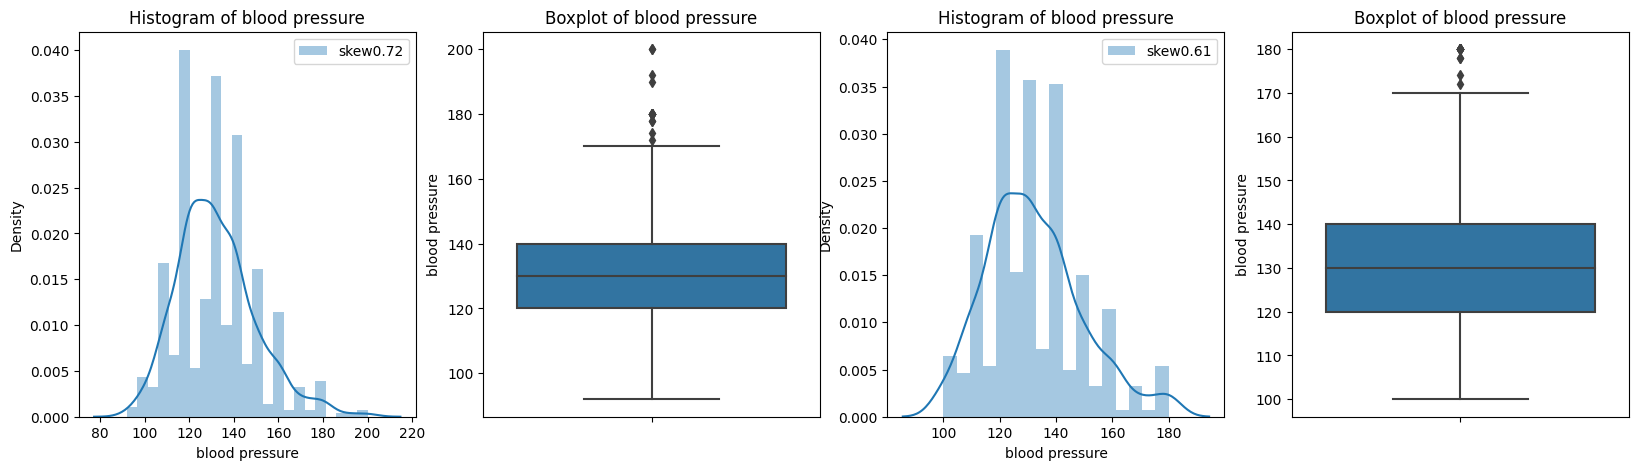

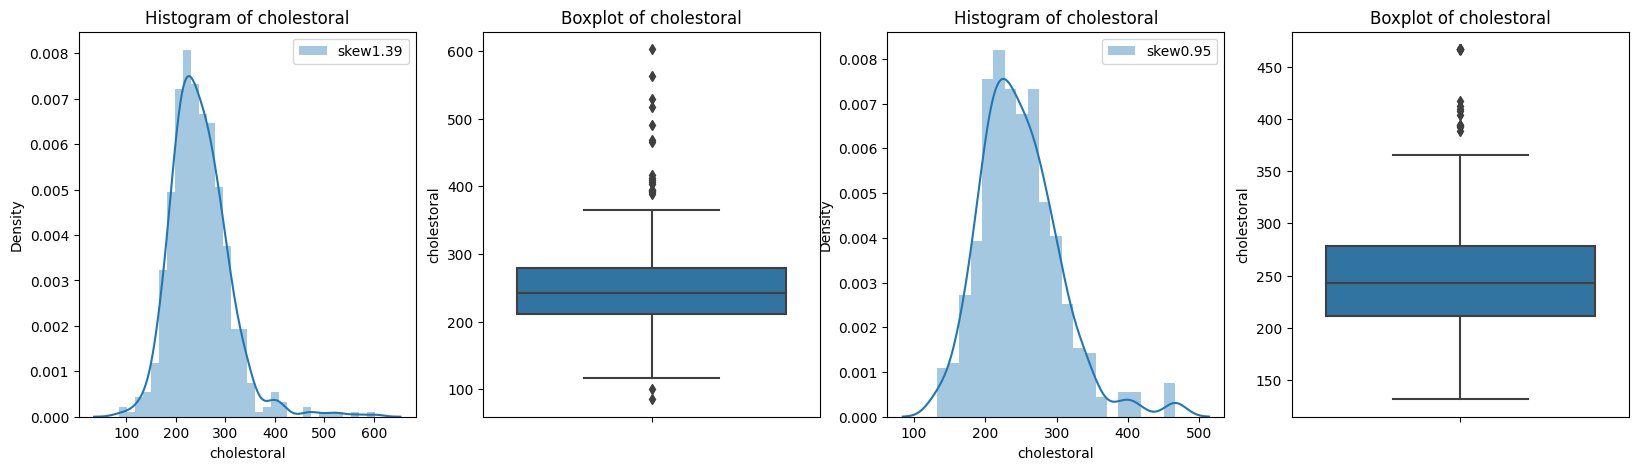

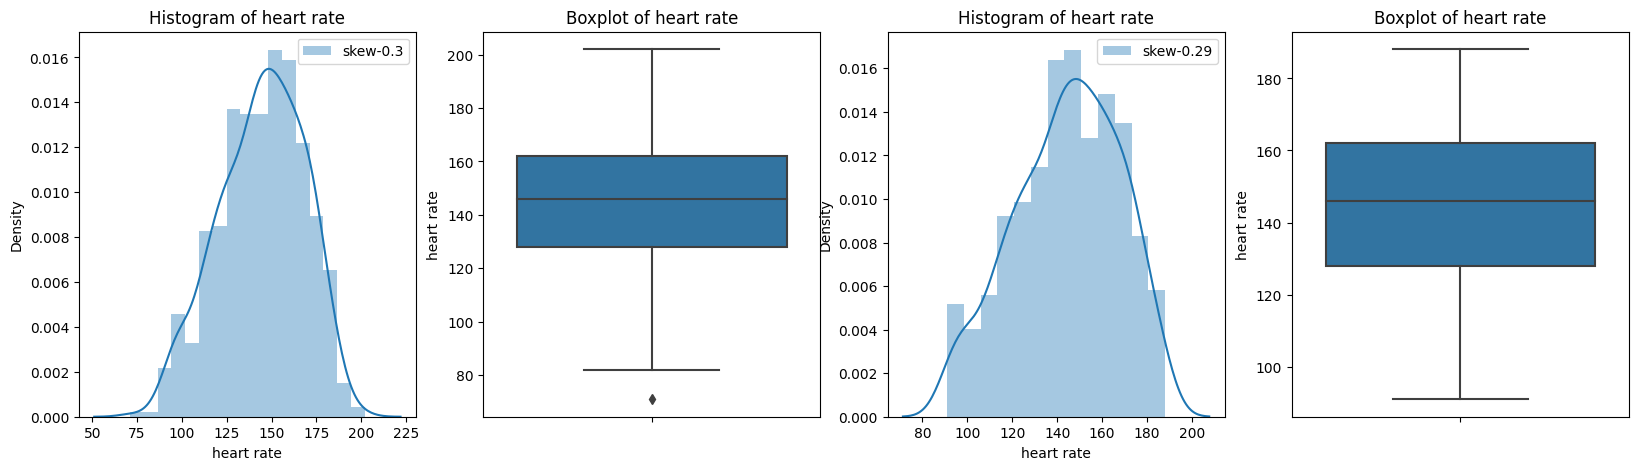

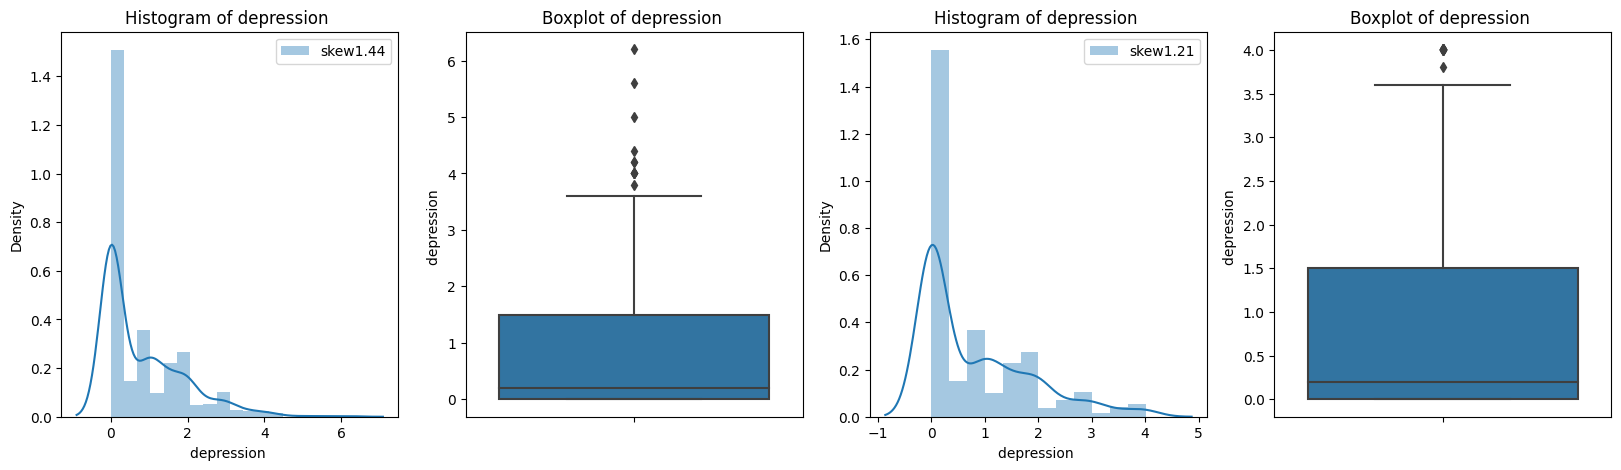

In [28]:
for c in goal_feature:
    plt.figure(figsize=(20,5))
#BEfore
    plt.subplot(141)
    sns.distplot(df1[c], label="skew" + str(np.round(df1[c].skew(),2)))
    plt.title(f"Histogram of {c}")
    plt.legend()

    
    # Plotting boxplot
    plt.subplot(142)
    sns.boxplot(data=df1, y=c)
    plt.title(f"Boxplot of {c}")
    
#AFTER

    plt.subplot(143)
    sns.distplot(df[c], label="skew" + str(np.round(df[c].skew(),2)))
    plt.title(f"Histogram of {c}")
    plt.legend()

    
    # Plotting boxplot
    plt.subplot(144)
    sns.boxplot(data=df, y=c)
    plt.title(f"Boxplot of {c}")

# Missing data Detection 
### **isnull().sum()**

In [29]:
df.isnull().sum()

age                      0
sex                      0
chest pain               0
blood pressure           1
cholestoral             23
blood sugar              8
electrocardiographic     1
heart rate               1
exercise induced         1
depression               0
c                        0
dtype: int64

In [30]:
df.isnull().mean() * 100

age                     0.000000
sex                     0.000000
chest pain              0.000000
blood pressure          0.167504
cholestoral             3.852596
blood sugar             1.340034
electrocardiographic    0.167504
heart rate              0.167504
exercise induced        0.167504
depression              0.000000
c                       0.000000
dtype: float64

<Figure size 500x500 with 0 Axes>

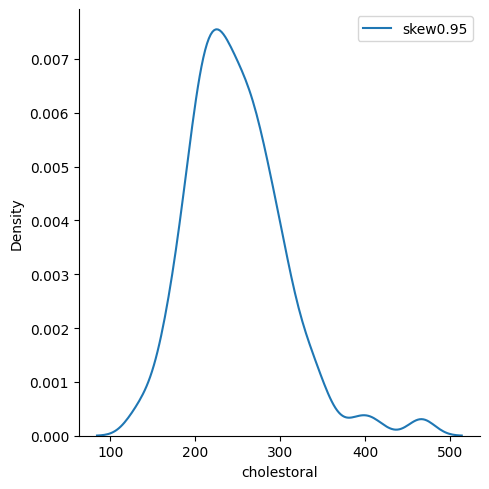

In [31]:
plt.figure(figsize=(5,5))
sns.displot(df['cholestoral'], label = "skew" + str(round(df['cholestoral'].skew(),2)),kind='kde')
plt.legend()

In [32]:
df[['electrocardiographic','exercise induced','blood pressure']].mode()

,electrocardiographic,exercise induced,blood pressure
0,0.0,0.0,120.0


# Missing Value Management

### fillna() , median(), mode()

In [33]:
df[['blood pressure', 'cholestoral', 'heart rate']]= df[['blood pressure', 'cholestoral', 'heart rate']].fillna(df[['blood pressure', 'cholestoral', 'heart rate']].median())

In [34]:
df[['electrocardiographic','exercise induced','blood pressure']] = df[['electrocardiographic','exercise induced','blood pressure']].fillna(0)

In [35]:
df.isnull().sum()

age                     0
sex                     0
chest pain              0
blood pressure          0
cholestoral             0
blood sugar             8
electrocardiographic    0
heart rate              0
exercise induced        0
depression              0
c                       0
dtype: int64

In [36]:
df['blood sugar'].mode()

0    0.0
Name: blood sugar, dtype: float64

In [37]:
df['blood sugar'] = df['blood sugar'].fillna(0)
df['blood sugar'].isnull().sum()


0

In [38]:
df.isnull().sum()

age                     0
sex                     0
chest pain              0
blood pressure          0
cholestoral             0
blood sugar             0
electrocardiographic    0
heart rate              0
exercise induced        0
depression              0
c                       0
dtype: int64

In [39]:
df

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
0,63.0,1,1,145.0,233.00,1.0,2.0,150.0,0.0,2.3,0
1,37.0,1,3,130.0,250.00,0.0,0.0,187.0,0.0,3.5,0
2,41.0,0,2,130.0,204.00,0.0,2.0,172.0,0.0,1.4,0
3,56.0,1,2,120.0,236.00,0.0,0.0,178.0,0.0,0.8,0
4,57.0,0,4,120.0,354.00,0.0,0.0,163.0,1.0,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...
592,52.0,1,4,140.0,266.00,0.0,0.0,134.0,1.0,2.0,1
593,43.0,1,4,140.0,288.00,0.0,0.0,135.0,1.0,2.0,1
594,41.0,1,4,120.0,336.00,0.0,0.0,118.0,1.0,3.0,1
595,44.0,1,4,135.0,466.54,0.0,0.0,135.0,0.0,0.0,1


# Duplicate data Handeling

In [40]:
df.loc[df.duplicated()]

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
265,49.0,0,2,110.0,242.5,0.0,0.0,160.0,0.0,0.0,0


In [41]:
df.drop_duplicates(inplace=True)
df.shape

(596, 11)

0    351
1    245
Name: c, dtype: int64


<Axes: xlabel='c', ylabel='count'>

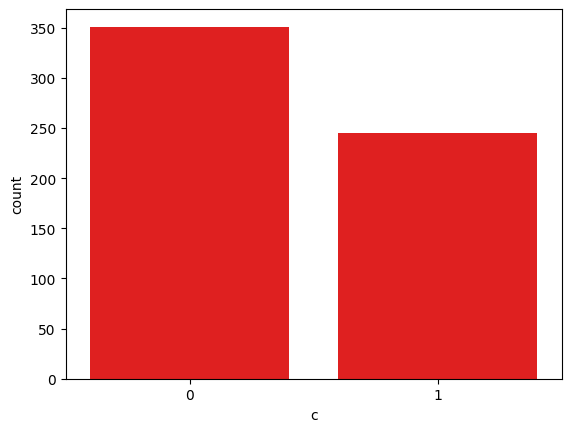

In [42]:
X = df.drop(['c'],axis= 1 )
y = df.c
print( df.loc[:, 'c'].value_counts())

sns.countplot(data=df,x='c',color='red')

In [43]:
from joblib import dump, load
dump( df,'Preprocess.joblib')


['Preprocess.joblib']

In [44]:
load ('Preprocess.joblib')

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
0,63.0,1,1,145.0,233.00,1.0,2.0,150.0,0.0,2.3,0
1,37.0,1,3,130.0,250.00,0.0,0.0,187.0,0.0,3.5,0
2,41.0,0,2,130.0,204.00,0.0,2.0,172.0,0.0,1.4,0
3,56.0,1,2,120.0,236.00,0.0,0.0,178.0,0.0,0.8,0
4,57.0,0,4,120.0,354.00,0.0,0.0,163.0,1.0,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...
592,52.0,1,4,140.0,266.00,0.0,0.0,134.0,1.0,2.0,1
593,43.0,1,4,140.0,288.00,0.0,0.0,135.0,1.0,2.0,1
594,41.0,1,4,120.0,336.00,0.0,0.0,118.0,1.0,3.0,1
595,44.0,1,4,135.0,466.54,0.0,0.0,135.0,0.0,0.0,1


# Feature Engineering

## Filter
### 1)corrolation matrix
### 2)chi-squard
### 3)matual matrix

In [45]:
#correlation matrix

# Display the correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
age,1.000000,-0.060330,0.146138,0.245178,0.127827,0.179713,0.260005,-0.300665,0.154882,0.259033,0.217969
sex,-0.060330,1.000000,0.118245,0.008333,-0.078541,0.038918,-0.037621,-0.087323,0.148814,0.099114,0.266879
chest pain,0.146138,0.118245,1.000000,0.019039,0.104098,0.001123,0.074334,-0.320551,0.438328,0.278430,0.462721
blood pressure,0.245178,0.008333,0.019039,1.000000,0.110602,0.134863,0.073104,-0.119919,0.135983,0.179918,0.138675
cholestoral,0.127827,-0.078541,0.104098,0.110602,1.000000,0.042098,0.093289,-0.074041,0.121881,0.078646,0.144455
blood sugar,0.179713,0.038918,0.001123,0.134863,0.042098,1.000000,0.113412,-0.003781,0.063669,0.057154,0.090583
electrocardiographic,0.260005,-0.037621,0.074334,0.073104,0.093289,0.113412,1.000000,0.051389,0.071418,0.176138,0.134927
heart rate,-0.300665,-0.087323,-0.320551,-0.119919,-0.074041,-0.003781,0.051389,1.000000,-0.376262,-0.262675,-0.341415
exercise induced,0.154882,0.148814,0.438328,0.135983,0.121881,0.063669,0.071418,-0.376262,1.000000,0.435367,0.504280
depression,0.259033,0.099114,0.278430,0.179918,0.078646,0.057154,0.176138,-0.262675,0.435367,1.000000,0.486970


In [46]:
corr_matrix = df.corr()

threshold = 0.2  # Adjust the threshold value as needed

# Find features with correlation above the threshold
high_corr_features = np.where(np.abs(corr_matrix) > threshold)

# Get unique feature pairs with high correlation
high_corr_pairs = [(corr_matrix.index[X], corr_matrix.columns[y]) for X, y in zip(*high_corr_features)
                   if X != y and X < y]

# Print the pairs of highly correlated features
for feature_pair in high_corr_pairs:
    print("Highly correlated features:", feature_pair)

Highly correlated features: ('age', 'blood pressure')
Highly correlated features: ('age', 'electrocardiographic')
Highly correlated features: ('age', 'heart rate')
Highly correlated features: ('age', 'depression ')
Highly correlated features: ('age', 'c')
Highly correlated features: ('sex', 'c')
Highly correlated features: ('chest pain', 'heart rate')
Highly correlated features: ('chest pain', 'exercise induced')
Highly correlated features: ('chest pain', 'depression ')
Highly correlated features: ('chest pain', 'c')
Highly correlated features: ('heart rate', 'exercise induced')
Highly correlated features: ('heart rate', 'depression ')
Highly correlated features: ('heart rate', 'c')
Highly correlated features: ('exercise induced', 'depression ')
Highly correlated features: ('exercise induced', 'c')
Highly correlated features: ('depression ', 'c')


In [47]:
#chi2

from sklearn.feature_selection import chi2,SelectKBest

# Apply chi-square feature selection
k = 5  # Select the top 5 features
selector = SelectKBest(score_func=chi2, k=k)
X_chi2 = selector.fit_transform(X,y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['age', 'cholestoral', 'heart rate', 'exercise induced', 'depression '], dtype='object')


#### The Selected features by chi-2: Index(['age', 'cholestoral', 'heart rate', 'exercise induced', 'depression ']

In [48]:
# Matual information
from sklearn.feature_selection import mutual_info_classif

k = 5 
selector_m = SelectKBest(score_func=mutual_info_classif,k=5)

selected_feature_indices_m = selector.get_support(indices=True)

selected_features_m = X.columns[selected_feature_indices_m]

print("the selected features by Matual Infromation:{}".format(selected_features_m))

the selected features by Matual Infromation:Index(['age', 'cholestoral', 'heart rate', 'exercise induced', 'depression '], dtype='object')


#### The Selected features by matual informatio: Index(['age', 'cholestoral', 'heart rate', 'exercise induced', 'depression ']

# Wrapper Method

## Forward

In [49]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


sfs = SFS(RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1),
         k_features=(3,7),
         forward= True,
         cv=10,
         scoring="accuracy",
          n_jobs= -1
         ).fit(X,y)

In [50]:
sfs.k_feature_names_

('sex',
 'chest pain',
 'blood pressure',
 'cholestoral',
 'blood sugar',
 'heart rate',
 'depression ')

In [51]:
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.75, 0.7166666666666667, 0.75, 0.71666666666...",0.771893,"(chest pain,)",0.032692,0.044018,0.014673
2,"(2, 5)","[0.75, 0.7166666666666667, 0.75, 0.71666666666...",0.771893,"(chest pain, blood sugar)",0.032692,0.044018,0.014673
3,"(1, 2, 5)","[0.6833333333333333, 0.7333333333333333, 0.733...",0.776921,"(sex, chest pain, blood sugar)",0.038185,0.051413,0.017138
4,"(1, 2, 5, 9)","[0.65, 0.7666666666666667, 0.6333333333333333,...",0.773785,"(sex, chest pain, blood sugar, depression )",0.057158,0.076958,0.025653
5,"(1, 2, 4, 5, 9)","[0.75, 0.75, 0.7, 0.75, 0.7833333333333333, 0....",0.782175,"(sex, chest pain, cholestoral, blood sugar, de...",0.031383,0.042255,0.014085
6,"(1, 2, 4, 5, 7, 9)","[0.7333333333333333, 0.7333333333333333, 0.733...",0.802288,"(sex, chest pain, cholestoral, blood sugar, he...",0.039373,0.053012,0.017671
7,"(1, 2, 3, 4, 5, 7, 9)","[0.7833333333333333, 0.7333333333333333, 0.716...",0.804011,"(sex, chest pain, blood pressure, cholestoral,...",0.038966,0.052464,0.017488


In [52]:
sfs.k_score_

0.8040112994350281

# backward

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1),
         k_features=(3,7),
         forward= False,
         cv=10,
         scoring="accuracy",
          n_jobs= -1
         ).fit(X,y)

In [54]:
sfs1.k_feature_names_

('sex', 'chest pain', 'cholestoral', 'heart rate', 'depression ')

In [55]:
sfs1.k_score_

0.8156214689265535

In [56]:
pd.DataFrame(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.7, 0.7833333333333333, 0.6, 0.6833333333333...",0.784068,"(age, sex, chest pain, blood pressure, cholest...",0.068302,0.091962,0.030654
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.8333333333333334, 0.7666666666666667, 0.633...",0.795621,"(age, sex, chest pain, blood pressure, cholest...",0.053253,0.071701,0.0239
8,"(1, 2, 3, 4, 5, 6, 7, 9)","[0.8, 0.7, 0.7, 0.7333333333333333, 0.88333333...",0.79726,"(sex, chest pain, blood pressure, cholestoral,...",0.047297,0.063681,0.021227
7,"(1, 2, 3, 4, 5, 7, 9)","[0.7833333333333333, 0.7333333333333333, 0.716...",0.804011,"(sex, chest pain, blood pressure, cholestoral,...",0.038966,0.052464,0.017488
6,"(1, 2, 3, 4, 7, 9)","[0.7833333333333333, 0.75, 0.7166666666666667,...",0.80904,"(sex, chest pain, blood pressure, cholestoral,...",0.042898,0.057759,0.019253
5,"(1, 2, 4, 7, 9)","[0.7666666666666667, 0.7333333333333333, 0.733...",0.815621,"(sex, chest pain, cholestoral, heart rate, dep...",0.047167,0.063506,0.021169
4,"(1, 2, 4, 9)","[0.8166666666666667, 0.8166666666666667, 0.7, ...",0.788729,"(sex, chest pain, cholestoral, depression )",0.027267,0.036713,0.012238
3,"(1, 2, 9)","[0.7666666666666667, 0.75, 0.6666666666666666,...",0.783729,"(sex, chest pain, depression )",0.044097,0.059373,0.019791


# Exhaustive Feature Selection  
### The most Expensive Feature Selection

In [57]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier

In [58]:
efs = EFS(RandomForestClassifier(random_state=42,n_estimators=100),
         min_features=5,
         max_features=6,
         scoring= "accuracy",
         cv = 10,
         n_jobs= -1).fit(X,y)
efs

Features: 462/462

ExhaustiveFeatureSelector(cv=10,
                          estimator=RandomForestClassifier(random_state=42),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9]],
                          max_features=6, min_features=5, n_jobs=-1)

In [59]:
dump(efs,"efs")

['efs']

In [60]:
efs.best_feature_names_

('sex', 'chest pain', 'cholestoral', 'heart rate', 'depression ')

In [61]:
efs.best_score_

0.8156214689265535

In [62]:
pd.DataFrame(efs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0, 1, 2, 3, 4)","[0.8166666666666667, 0.6833333333333333, 0.65,...",0.760282,"(age, sex, chest pain, blood pressure, cholest...",0.044878,0.060424,0.020141
1,"(0, 1, 2, 3, 5)","[0.7666666666666667, 0.6666666666666666, 0.716...",0.736667,"(age, sex, chest pain, blood pressure, blood s...",0.03199,0.043072,0.014357
2,"(0, 1, 2, 3, 6)","[0.7333333333333333, 0.7333333333333333, 0.666...",0.740113,"(age, sex, chest pain, blood pressure, electro...",0.042486,0.057204,0.019068
3,"(0, 1, 2, 3, 7)","[0.7833333333333333, 0.6833333333333333, 0.65,...",0.750085,"(age, sex, chest pain, blood pressure, heart r...",0.039417,0.053071,0.01769
4,"(0, 1, 2, 3, 8)","[0.8, 0.7833333333333333, 0.65, 0.633333333333...",0.766836,"(age, sex, chest pain, blood pressure, exercis...",0.053704,0.072307,0.024102
...,...,...,...,...,...,...,...
457,"(3, 4, 5, 6, 8, 9)","[0.6, 0.6666666666666666, 0.6166666666666667, ...",0.735367,"(blood pressure, cholestoral, blood sugar, ele...",0.058773,0.079133,0.026378
458,"(3, 4, 5, 7, 8, 9)","[0.6833333333333333, 0.7, 0.6833333333333333, ...",0.785706,"(blood pressure, cholestoral, blood sugar, hea...",0.061157,0.082343,0.027448
459,"(3, 4, 6, 7, 8, 9)","[0.65, 0.7166666666666667, 0.6166666666666667,...",0.763927,"(blood pressure, cholestoral, electrocardiogra...",0.062551,0.084219,0.028073
460,"(3, 5, 6, 7, 8, 9)","[0.6666666666666666, 0.65, 0.55, 0.56666666666...",0.721949,"(blood pressure, blood sugar, electrocardiogra...",0.074221,0.099932,0.033311


### The best Feature selection by EFS is:  ('sex', 'chest pain', 'cholestoral', 'heart rate', 'depression ')

In [63]:
X_efs = df[['sex', 'chest pain', 'cholestoral', 'heart rate', 'depression ']]
X_efs

,sex,chest pain,cholestoral,heart rate,depression
0,1,1,233.00,150.0,2.3
1,1,3,250.00,187.0,3.5
2,0,2,204.00,172.0,1.4
3,1,2,236.00,178.0,0.8
4,0,4,354.00,163.0,0.6
...,...,...,...,...,...
592,1,4,266.00,134.0,2.0
593,1,4,288.00,135.0,2.0
594,1,4,336.00,118.0,3.0
595,1,4,466.54,135.0,0.0


# Build a New DataFrame from Feature Engineering(EFS)

In [64]:
df5 = pd.DataFrame(X_efs)
df5['c'] = y
df5

,sex,chest pain,cholestoral,heart rate,depression,c
0,1,1,233.00,150.0,2.3,0
1,1,3,250.00,187.0,3.5,0
2,0,2,204.00,172.0,1.4,0
3,1,2,236.00,178.0,0.8,0
4,0,4,354.00,163.0,0.6,0
...,...,...,...,...,...,...
592,1,4,266.00,134.0,2.0,1
593,1,4,288.00,135.0,2.0,1
594,1,4,336.00,118.0,3.0,1
595,1,4,466.54,135.0,0.0,1


In [65]:
dump( df5,'df5.joblib')
dump(efs,'efs.joblib')

['efs.joblib']

# Train Test Split

In [66]:
df_train , df_test =train_test_split(df,test_size=0.2,shuffle= True, random_state= 42)

In [67]:
x_train = df_train.drop('c',axis=1)
y_train = df_train['c']

x_test = df_test.drop('c',axis=1)
y_test = df_test['c']

# Normalization MinMaxScaler

In [68]:
scaler = MinMaxScaler()
col = x_train.columns
x_train[col] = scaler.fit_transform(x_train[col])
x_train[col].head(10)

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression
427,0.384221,1.0,1.000000,0.1250,0.209880,0.0,0.0,0.607823,1.0,0.000000
520,0.614754,1.0,1.000000,0.5000,0.254682,0.0,0.0,0.206382,1.0,1.000000
137,0.794057,1.0,0.333333,0.3500,0.227801,1.0,1.0,0.504889,0.0,0.000000
595,0.332992,1.0,1.000000,0.4375,1.000000,0.0,0.0,0.453423,0.0,0.000000
320,0.589139,1.0,0.000000,0.2500,0.117290,0.0,0.0,0.474009,0.0,0.499002
176,0.307377,0.0,0.000000,0.0000,0.272602,0.0,0.0,0.525476,0.0,0.000000
361,0.486680,1.0,0.666667,0.5000,0.302470,0.0,0.0,0.741637,0.0,0.149701
109,0.486680,0.0,1.000000,0.1250,0.365192,0.0,1.0,0.700463,0.0,0.000000
426,0.076844,1.0,0.000000,0.5000,0.072489,0.0,0.0,0.916624,0.0,0.000000
244,0.076844,0.0,0.333333,0.3750,0.087423,0.0,0.0,1.000000,0.0,0.000000


## ! Do not fit the Test values(JUST Transform it)

In [69]:
x_test[col] = scaler.transform(x_test[col])
x_test[col].head()

,age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression
188,0.256148,0.0,0.333333,0.125,0.353245,0.0,0.5,0.525476,0.0,0.000000
238,0.461066,0.0,0.666667,0.375,0.224814,0.0,0.5,0.453423,0.0,0.000000
463,0.794057,0.0,1.000000,0.475,0.484663,1.0,0.0,0.154915,0.0,0.474052
466,0.640369,1.0,1.000000,0.375,0.451808,1.0,1.0,0.124035,1.0,0.399202
182,0.537910,1.0,0.333333,0.250,0.454795,0.0,0.0,0.278435,0.0,0.000000


In [70]:
dump(x_train, 'xtrain.joblib')
dump(y_train, 'xtrain.joblib')
dump(x_test, 'xtrain.joblib')
dump(y_test, 'xtrain.joblib')

['xtrain.joblib']

# HyperTunnig Model

### function that use for Tunne the models with GridSearch Alghorithm

In [71]:
from sklearn.model_selection import GridSearchCV
def GrdSrch_Tune(model, X, y, params):
    
    clf = GridSearchCV(model, params, scoring ='accuracy', cv = 5, n_jobs=-1)
    clf.fit(X, y)
    
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is{} :" .format(clf.best_params_))
    
    return (clf.best_score_)


In [72]:
params_DT = {
    'max_depth': [3,4,5],
    'min_samples_split': [2,3, 5, 10,15],
    'min_samples_leaf': [1, 2,4,5,8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
from sklearn.tree import DecisionTreeClassifier
GrdSrch_Tune(DecisionTreeClassifier(random_state = 42), x_train,y_train, params_DT )

best score is : 0.7899780701754386
best estimator is : DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=8, random_state=42)
best Params is{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2} :


0.7899780701754386

In [73]:
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=8, random_state=42)
DT_Model.fit(x_train,y_train)
y_pred = DT_Model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [74]:
dump(DT_Model,"DT_Model.joblib")

['DT_Model.joblib']

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
#classificatoin Report
rep = classification_report(y_test,y_pred)
print(rep)

#confusion Matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.65      0.72      0.68        43

    accuracy                           0.76       120
   macro avg       0.74      0.75      0.74       120
weighted avg       0.77      0.76      0.76       120

[[60 17]
 [12 31]]


Text(0.5, 1.0, 'Confusion Matrix')

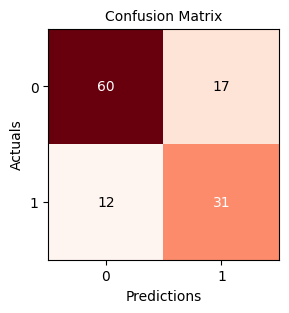

In [76]:
#mlxtend plot_confusion_matrix

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf,figsize=(3,3), cmap=plt.cm.Reds)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [77]:
scores_DT = cross_val_score(DT_Model, x_train, y_train ,cv = 10, scoring = 'accuracy')
avg_scores_DT = scores_DT.mean()
avg_scores_DT

0.762854609929078

In [78]:
scores_DT_test = cross_val_score(DT_Model, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_DT_test = scores_DT_test.mean()
avg_scores_DT_test

0.75

In [79]:
print("Train score is:",format(avg_scores_DT))
print("Test score is:",format(avg_scores_DT_test))

Train score is: 0.762854609929078
Test score is: 0.75


# KNN

In [80]:
 from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Text(0.5, 1.0, 'KNN: Accuracy Score for Different k Values')

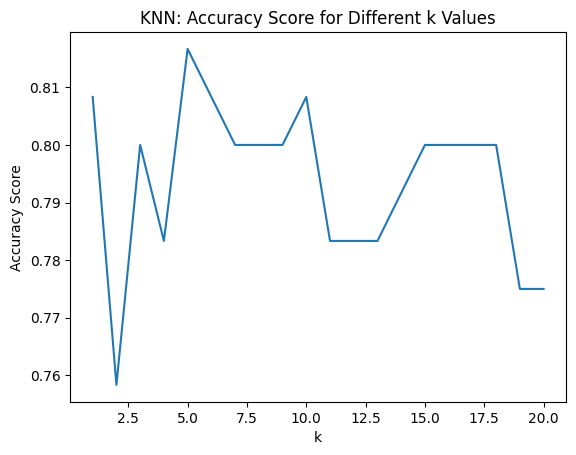

In [81]:
# k lplotting
k = list(range(1,21))
score = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    
    # Fit the model to the training data
    knn.fit(x_train, y_train)
    
    # Predict the labels for the test data
    y_pred_knn = knn.predict(x_test)
    # Calculate the accuracy score and store it
    accuracy = accuracy_score(y_test, y_pred_knn)
    score.append(accuracy)

# Plot the accuracy scores for different k values
plt.plot(k, score)
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('KNN: Accuracy Score for Different k Values')


In [82]:
knn_ml = KNeighborsClassifier(n_neighbors=6,weights='distance',n_jobs=-1)
knn_ml.fit(x_train,y_train)
y_pred_knn_ml = knn_ml.predict(x_test)

acc_knn= accuracy_score(y_test,y_pred_knn_ml)
acc_knn

0.8166666666666667

In [83]:
dump(knn_ml,"knn.joblib")

['knn.joblib']

In [84]:
rep_knn = classification_report(y_test,y_pred_knn_ml)
print(rep_knn)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.76      0.72      0.74        43

    accuracy                           0.82       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.82      0.82      0.82       120



Text(0.5, 1.0, 'Confusion Matrix')

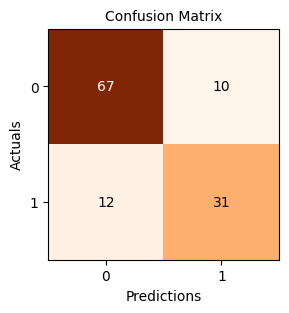

In [85]:
#plot confusion matrix
conf_knn = confusion_matrix(y_test,y_pred_knn_ml)
fig, ax = plot_confusion_matrix(conf_mat=conf_knn,figsize=(3,3), cmap=plt.cm.Oranges)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [86]:
score_knn = cross_val_score(knn_ml,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_knn = score_knn.mean()
avg_scores_knn

0.7856826241134751

In [87]:
scores_knn_test = cross_val_score(knn_ml, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_knn_test = scores_knn_test.mean()
print("Train score is:",format(avg_scores_knn))
print("Test score is:",format(avg_scores_knn_test))

Train score is: 0.7856826241134751
Test score is: 0.8


# Naive Baise

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)
y_pred_NB

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [90]:
dump(NB, "NB.joblib")

['NB.joblib']

In [91]:
rep_NB = classification_report(y_test,y_pred_NB)
print(rep_NB)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.73      0.74      0.74        43

    accuracy                           0.81       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.81      0.81      0.81       120



Text(0.5, 1.0, 'Confusion Matrix')

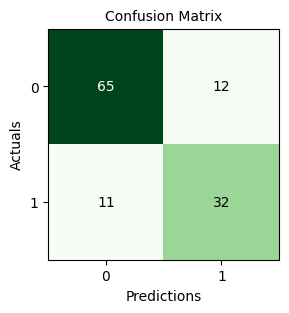

In [92]:
conf_NB = confusion_matrix(y_test,y_pred_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_NB,figsize=(3,3), cmap=plt.cm.Greens)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [93]:
score_NB = cross_val_score(NB,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_NB = score_NB.mean()
scores_NB_test = cross_val_score(NB, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_NB_test = scores_NB_test.mean()
print("Train score is:",format(avg_scores_NB))
print("Test score is:",format(avg_scores_NB_test))

Train score is: 0.8004432624113476
Test score is: 0.7666666666666667


# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
logreg = GrdSrch_Tune(LogisticRegression(random_state=42),x_train,y_train,param_grid)
logreg

best score is : 0.8130263157894737
best estimator is : LogisticRegression(C=1, random_state=42, solver='liblinear')
best Params is{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} :


0.8130263157894737

In [96]:
logreg_ml = LogisticRegression(C=1, random_state=42, solver='liblinear')
logreg_ml.fit(x_train,y_train)
y_pred_logreg = logreg_ml.predict(x_test)
y_pred_logreg

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [97]:
dump(logreg_ml,"logistic.joblib")

['logistic.joblib']

In [98]:
rep_Logreg = classification_report(y_test,y_pred_logreg)
print(rep_Logreg)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.75      0.70      0.72        43

    accuracy                           0.81       120
   macro avg       0.79      0.78      0.79       120
weighted avg       0.81      0.81      0.81       120



Text(0.5, 1.0, 'Confusion Matrix')

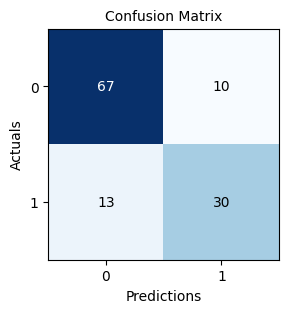

In [99]:
conf_logreg = confusion_matrix(y_test,y_pred_logreg)
fig, ax = plot_confusion_matrix(conf_mat=conf_logreg,figsize=(3,3), cmap=plt.cm.Blues)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [100]:
import statsmodels.api as sm
# x = sm.add_constant(x)

logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449834
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      c   No. Observations:                  476
Model:                          Logit   Df Residuals:                      466
Method:                           MLE   Df Model:                            9
Date:                Sat, 22 Jul 2023   Pseudo R-squ.:                  0.3401
Time:                        15:55:13   Log-Likelihood:                -214.12
converged:                       True   LL-Null:                       -324.47
Covariance Type:            nonrobust   LLR p-value:                 1.490e-42
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -1.4695      0.525     -2.798      0.005      -2.499      -0.440

In [101]:
dump(logit_model,"logistic1.joblib")

['logistic1.joblib']

In [102]:
score_logreg = cross_val_score(logreg_ml,x_train,y_train,cv = 10,scoring="accuracy")
score_logreg.mean()

score_logreg = cross_val_score(logreg_ml,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_logreg = score_logreg.mean()
scores_logreg_test = cross_val_score(logreg_ml, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_logreg_test = scores_logreg_test.mean()
print("Train score is:",format(avg_scores_logreg))
print("Test score is:",format(avg_scores_logreg_test))

Train score is: 0.819104609929078
Test score is: 0.8083333333333333


# ? How check the overfitting in statsmodels

In [103]:
#score_logit_model = cross_val_score(logit_model,x_train,y_train,cv=10,scoring='accuracy')
#avg_scores_logit_model = score_logit_model.mean()
#scores_logit_model_test = cross_val_score(logit_model, x_test, y_test ,cv = 10, scoring = 'accuracy')
#avg_scores_logit_model_test = scores_logit_model_test.mean()
#print("Train score is:",format(avg_scores_logit_model))
#print("Test score is:",format(avg_scores_logit_model_test))

# Neural Network Algorithm

In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
MLP_sam = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (50,25),random_state=42,
                    learning_rate_init = 0.05,
                    learning_rate = 'invscaling',
                    momentum = 0.9, max_iter = 50 ,verbose=1)

scores = cross_val_score(MLP_sam, x_train , y_train , cv =10 , scoring = 'accuracy')
print(scores.mean())


Iteration 1, loss = 0.77900127
Iteration 2, loss = 0.67990737
Iteration 3, loss = 0.69478664
Iteration 4, loss = 0.66609969
Iteration 5, loss = 0.65685747
Iteration 6, loss = 0.64132622
Iteration 7, loss = 0.60688730
Iteration 8, loss = 0.55622424
Iteration 9, loss = 0.49325491
Iteration 10, loss = 0.45014921
Iteration 11, loss = 0.44512953
Iteration 12, loss = 0.44349229
Iteration 13, loss = 0.46229813
Iteration 14, loss = 0.42180597
Iteration 15, loss = 0.42300039
Iteration 16, loss = 0.40970254
Iteration 17, loss = 0.40566235
Iteration 18, loss = 0.40521169
Iteration 19, loss = 0.40190464
Iteration 20, loss = 0.40144788
Iteration 21, loss = 0.39924561
Iteration 22, loss = 0.39832062
Iteration 23, loss = 0.39771113
Iteration 24, loss = 0.39810066
Iteration 25, loss = 0.39922634
Iteration 26, loss = 0.39852007
Iteration 27, loss = 0.39899645
Iteration 28, loss = 0.40005048
Iteration 29, loss = 0.40319619
Iteration 30, loss = 0.39278617
Iteration 31, loss = 0.41074047
Iteration 32, los

Iteration 35, loss = 0.42081996
Iteration 36, loss = 0.42133734
Iteration 37, loss = 0.41662431
Iteration 38, loss = 0.42365651
Iteration 39, loss = 0.41854109
Iteration 40, loss = 0.42212488
Iteration 41, loss = 0.42408062
Iteration 42, loss = 0.41043792
Iteration 43, loss = 0.43337591
Iteration 44, loss = 0.41490791
Iteration 45, loss = 0.42351985
Iteration 46, loss = 0.41291163
Iteration 47, loss = 0.41098411
Iteration 48, loss = 0.40847730
Iteration 49, loss = 0.40979822
Iteration 50, loss = 0.40990373
Iteration 1, loss = 0.75751838
Iteration 2, loss = 0.69241971
Iteration 3, loss = 0.70834845
Iteration 4, loss = 0.66986744
Iteration 5, loss = 0.66161026
Iteration 6, loss = 0.64832886
Iteration 7, loss = 0.61939764
Iteration 8, loss = 0.57219953
Iteration 9, loss = 0.51980668
Iteration 10, loss = 0.45806120
Iteration 11, loss = 0.44566855
Iteration 12, loss = 0.43994985
Iteration 13, loss = 0.43629739
Iteration 14, loss = 0.43487744
Iteration 15, loss = 0.43071319
Iteration 16, los

## Tune NN 

In [106]:
params_NN = {
    'hidden_layer_sizes': [(50, 25), (30, 15)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'max_iter': [10,20,50, 100]
}
mlp= GrdSrch_Tune(MLPClassifier(random_state=42),x_train,y_train,params_NN)
mlp

best score is : 0.819342105263158
best estimator is : MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25), max_iter=20,
              random_state=42, solver='lbfgs')
best Params is{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'learning_rate': 'constant', 'max_iter': 20, 'solver': 'lbfgs'} :


0.819342105263158

In [107]:
mlp_best =  MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25), max_iter=20,
              random_state=42, solver='lbfgs')
mlp_best.fit(x_train,y_train)
pred = mlp_best.predict(x_test)
pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [108]:
dump(mlp_best,"MLp.joblib")

['MLp.joblib']

In [109]:
pred = mlp_best.predict_proba(x_test)
pred

array([[0.96991495, 0.03008505],
       [0.92995421, 0.07004579],
       [0.30364342, 0.69635658],
       [0.06313104, 0.93686896],
       [0.81666286, 0.18333714],
       [0.94830462, 0.05169538],
       [0.10330959, 0.89669041],
       [0.98668161, 0.01331839],
       [0.82104801, 0.17895199],
       [0.10654955, 0.89345045],
       [0.34953783, 0.65046217],
       [0.03412581, 0.96587419],
       [0.9207606 , 0.0792394 ],
       [0.63492278, 0.36507722],
       [0.04445374, 0.95554626],
       [0.98513921, 0.01486079],
       [0.2201907 , 0.7798093 ],
       [0.74636902, 0.25363098],
       [0.91761539, 0.08238461],
       [0.60336938, 0.39663062],
       [0.98445535, 0.01554465],
       [0.875791  , 0.124209  ],
       [0.89591938, 0.10408062],
       [0.65011177, 0.34988823],
       [0.87269648, 0.12730352],
       [0.08323837, 0.91676163],
       [0.92420264, 0.07579736],
       [0.95068529, 0.04931471],
       [0.77330443, 0.22669557],
       [0.09776012, 0.90223988],
       [0.

In [110]:
score_mlp_best = cross_val_score(mlp_best,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_mlp_best = score_mlp_best.mean()

scores_mlp_best_test = cross_val_score(mlp_best, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_mlp_best_test = scores_mlp_best_test.mean()
import warnings
warnings.filterwarnings('ignore')
print("Train score is:",format(avg_scores_mlp_best))
print("Test score is:",format(avg_scores_mlp_best_test))

Train score is: 0.8150709219858155
Test score is: 0.7583333333333334


### Customize Your Bussiness 

In [111]:
pred_custom = np.zeros(len(pred))
pred_custom[   pred[:,1]>0.3   ] = 1
pred_custom

array([0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0.])

# SVM(SVC)

In [112]:
from sklearn.svm import SVC
param_SVC = {
    'C': [10,20,50,100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10]
}
svc = GrdSrch_Tune(SVC(random_state=42),x_train,y_train,param_SVC)


best score is : 0.8025877192982456
best estimator is : SVC(C=10, gamma=0.1, kernel='linear', random_state=42)
best Params is{'C': 10, 'gamma': 0.1, 'kernel': 'linear'} :


In [113]:
svc = SVC(C=10, gamma=0.1, kernel='linear', random_state=42)
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [114]:
df_rep_svc = pd.DataFrame({'actual data':y_test, 'predicted data':y_pred_svc})
df_rep_svc.head(10)

,actual data,predicted data
188,0,0
238,0,0
463,1,1
466,1,1
182,0,0
301,0,0
101,0,1
287,0,0
389,1,0
567,1,1


In [115]:
svc1 = SVC(C=10, gamma=0.1, kernel='linear', random_state=42, class_weight = {0:0.4 , 1:0.6})
svc1.fit(x_train,y_train)
y_pred_svc1 = svc1.predict(x_test)
cv_svc1 = cross_val_score(svc1,x_train,y_train,cv=10,scoring='accuracy' )
cv_svc1.mean()

0.8106826241134751

In [116]:
dump(svc1,"svc.joblib")

['svc.joblib']

In [117]:
rep_svc = classification_report(y_test,y_pred_svc1)
print(rep_svc)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        77
           1       0.71      0.79      0.75        43

    accuracy                           0.81       120
   macro avg       0.79      0.80      0.80       120
weighted avg       0.82      0.81      0.81       120



Text(0.5, 1.0, 'Confusion Matrix')

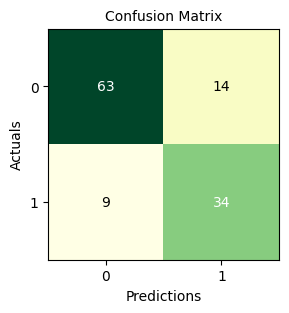

In [118]:
conf_svm = confusion_matrix(y_test,y_pred_svc1)
fig, ax = plot_confusion_matrix(conf_mat=conf_svm,figsize=(3,3), cmap=plt.cm.YlGn)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [119]:
score_svc1  = cross_val_score(svc1 ,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_svc1  = score_svc1.mean()

scores_svc1_test = cross_val_score(svc1, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_svc1_test = scores_svc1_test.mean()

print("Train score is:",format(avg_scores_svc1))
print("Test score is:",format(avg_scores_svc1_test))

Train score is: 0.8106826241134751
Test score is: 0.7916666666666667


# Ensamble Learning

In [120]:
DT = load('DT_Model.joblib')
knn = load('knn.joblib')
NB = load('NB.joblib')
LOG = load('logistic.joblib')
LOG1 = load("logistic1.joblib")
SVM = load('svc.joblib')
MLP = load('MLp.joblib')

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [122]:
voting_classifier_hard = VotingClassifier(estimators=[("knn",knn),("NB",NB),("LOG",LOG),("SVM",SVM),("MLP",MLP)],
                                    voting= "hard")
voting_classifier_hard.fit(x_train,y_train)
pred_classifier_hard = voting_classifier_hard.predict(x_test)

In [123]:
cv_vch = cross_val_score(voting_classifier_hard,x_train,y_train,cv=10,scoring='accuracy' )
cv_vch.mean()

0.8127659574468085

In [124]:
from sklearn.metrics import classification_report
rep_vch = classification_report(y_test,pred_classifier_hard)
print(rep_vch)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.74      0.72      0.73        43

    accuracy                           0.81       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.81      0.81      0.81       120



Text(0.5, 1.0, 'Confusion Matrix')

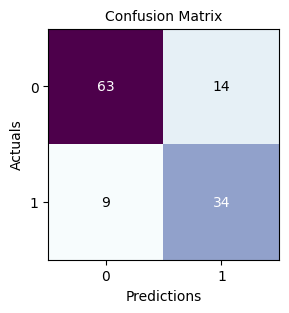

In [125]:
conf_vch= confusion_matrix(y_test,y_pred_svc1)
fig, ax = plot_confusion_matrix(conf_mat=conf_vch,figsize=(3,3), cmap=plt.cm.BuPu)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

# Bagging

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [127]:
DT_Bagging_model = BaggingClassifier(estimator=DT, n_estimators=100 ,random_state=42)
knn_Bagging_model = BaggingClassifier(estimator=knn, n_estimators=100 ,random_state=42)
LOG_Bagging_model = BaggingClassifier(estimator=LOG, n_estimators=100 ,random_state=42)
NB_Bagging_model = BaggingClassifier(estimator=NB, n_estimators=100 ,random_state=42)
SVM_Bagging_model = BaggingClassifier(estimator=SVM, n_estimators=100 ,random_state=42)
MLP_Bagging_model = BaggingClassifier(estimator=MLP, n_estimators=100 ,random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=12)

# def function of baggging method: 
def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=42 ,shuffle=True)
    results = cross_val_score(model, x_train, y_train, cv=k_folds)
    print(results.mean())

bagging_ensemble(DT_Bagging_model)
bagging_ensemble(knn_Bagging_model)
bagging_ensemble(LOG_Bagging_model)
bagging_ensemble(NB_Bagging_model)
bagging_ensemble(SVM_Bagging_model)
bagging_ensemble(MLP_Bagging_model)


bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.804800724637681
0.7983695652173912
0.8111413043478259
0.7961050724637679
0.8087862318840578
0.8025362318840579
0.7924818840579708
0.7797101449275362


In [128]:
dump(DT_Bagging_model,"DT_bag.joblib")
dump(knn_Bagging_model,"knn_bag.joblib")
dump(LOG_Bagging_model,"LOG_bag.joblib")
dump(NB_Bagging_model,"NB_bag.joblib")
dump(SVM_Bagging_model,"SVM_bag.joblib")
dump(MLP_Bagging_model,"MLP_bag.joblib")

dump(random_forest,"Rand_for.joblib")
dump(extra_trees,"Ex_trees.joblib")

['Ex_trees.joblib']

# Boosting LightGBM

In [129]:
import lightgbm
from sklearn.metrics import f1_score

In [130]:
lgbm = lightgbm.LGBMClassifier(boosting_type= 'gbdt',num_leaves=15,random_state=42,
                               n_estimators=100,class_weight='balanced',
                              learning_rate=0.1, colsample_bytree=0.8 , verbose=1,
                                force_col_wise=True)

lgbm_fit = lgbm.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=100, early_stopping_rounds=50)
lgbm_pred = lgbm_fit.predict(x_test, num_iteration=lgbm.best_iteration_)

print(accuracy_score(y_test, lgbm_pred))
print(f1_score(y_test, lgbm_pred, pos_label=1))
print(f1_score(y_test, lgbm_pred, pos_label=0))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 274
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 476, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
0.825
0.7640449438202247
0.8609271523178808


In [131]:
params_lbgm = {

'boosting_type': ['gbdt','dart','goss','rf'],
    'num_leaves': [10,20,30],
   'learning_rate':[0.05, 0.1, 0.15],
    'n_estimators': [100],
    'class_weight': ['balanced'],

    'colsample_bytree':[0.7, 0.9],
    'reg_alpha':[0.1, 0.3],
    'reg_lambda':[0.1, 0.3] ,
    'n_jobs': [-1],    
}
lgbm_best = GrdSrch_Tune(lightgbm.LGBMClassifier(random_state=42),x_train,y_train,params_lbgm)

best score is : 0.8110307017543861
best estimator is : LGBMClassifier(boosting_type='goss', class_weight='balanced',
               colsample_bytree=0.9, learning_rate=0.15, num_leaves=20,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1)
best Params is{'boosting_type': 'goss', 'class_weight': 'balanced', 'colsample_bytree': 0.9, 'learning_rate': 0.15, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 20, 'reg_alpha': 0.1, 'reg_lambda': 0.1} :


In [132]:
lgbm_best =lightgbm.LGBMClassifier(n_estimators=100,boosting_type='goss', class_weight='balanced',
               colsample_bytree=0.9, learning_rate=0.15, num_leaves=20,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1)
lgbm_best.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=100, early_stopping_rounds=50)
y_pred_lgbm = lgbm_best.predict(x_test, num_iteration=lgbm.best_iteration_)


In [133]:
print(accuracy_score(y_test, y_pred_lgbm))
print(f1_score(y_test, y_pred_lgbm, pos_label=1))
print(f1_score(y_test, y_pred_lgbm, pos_label=0))

0.8166666666666667
0.7555555555555555
0.8533333333333334


In [134]:
rep_lgbm= classification_report(y_test,y_pred_lgbm)
print(rep_lgbm)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        77
           1       0.72      0.79      0.76        43

    accuracy                           0.82       120
   macro avg       0.80      0.81      0.80       120
weighted avg       0.82      0.82      0.82       120



Text(0.5, 1.0, 'Confusion Matrix')

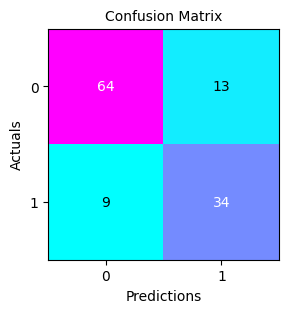

In [135]:
conf_lgbm= confusion_matrix(y_test,y_pred_lgbm)
fig, ax = plot_confusion_matrix(conf_mat=conf_lgbm,figsize=(3,3), cmap=plt.cm.cool)
  
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [136]:
score_lgbm  = cross_val_score(lgbm_best ,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_lgbm  = score_lgbm.mean()

scores_lgbm_test = cross_val_score(lgbm_best, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_lgbm_test = scores_lgbm_test.mean()

print("Train score is:",format(avg_scores_lgbm))
print("Test score is:",format(avg_scores_lgbm_test))

Train score is: 0.7879432624113476
Test score is: 0.8083333333333333


# Boosting xgboost

In [137]:
import xgboost as xgboost

In [138]:
param_xgboost = { 'n_estimators' :[100],

    'max_depth' : [3,5,10] ,
    'grow_policy' :[0,1],
    'learning_rate' : [0.1 , 0.2 , 1.3],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'n_jobs' : [-1],
    'gamma' : [0,0.1,1,10],
    'colsample_bytree ':[0.7 , 0.9],
    'reg_alpha' : [0.1, 0.3],
    'reg_lambda': [0.1, 0.3]     
}
xgboost_best = GrdSrch_Tune(xgboost.XGBClassifier(random_state=42),x_train,y_train,params_lbgm)

[16:03:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

best score is : 0.7836842105263158
best estimator is : XGBClassifier(base_score=None, booster=None, boosting_type='gbdt',
              callbacks=None, class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimat

In [139]:
xgboost_best = xgboost.XGBClassifier(base_score=None, booster=None, boosting_type='gbdt',
              callbacks=None, class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_leaves=10)

xgboost_best.fit(x_train, y_train)
y_pred_xgboost = xgboost_best.predict(x_test)


[16:03:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.



In [140]:
print(accuracy_score(y_test, y_pred_xgboost))
print(f1_score(y_test, y_pred_xgboost, pos_label=1))
print(f1_score(y_test, y_pred_xgboost, pos_label=0))

0.8166666666666667
0.7441860465116278
0.8571428571428571


In [141]:
rep_xgboost= classification_report(y_test,y_pred_xgboost)
print(rep_xgboost)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.74      0.74      0.74        43

    accuracy                           0.82       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.82      0.82      0.82       120



Text(0.5, 1.0, 'Confusion Matrix')

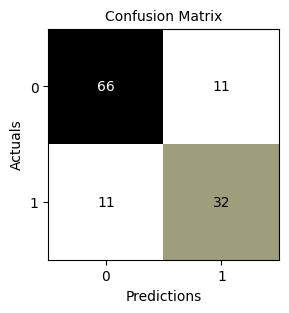

In [142]:
conf_xgboost= confusion_matrix(y_test,y_pred_xgboost)
fig, ax = plot_confusion_matrix(conf_mat=conf_xgboost,figsize=(3,3), cmap=plt.cm.gist_stern_r)

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [143]:
score_xgboost = cross_val_score(xgboost_best ,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_xgboost = score_xgboost.mean()

scores_xgboost_test = cross_val_score(xgboost_best, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_xgboost_test = scores_xgboost_test.mean()

print("Train score is:",format(avg_scores_xgboost))
print("Test score is:",format(avg_scores_xgboost_test))

[16:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-

In [144]:
dump(lgbm_best,"lgbm.joblib")
dump(xgboost_best,"xgboost.joblib")
dump(voting_classifier_hard,"voting_hard.joblib")

['voting_hard.joblib']

# Stacking

In [145]:
pred_mlp = np.zeros(len(pred))
pred_mlp[   pred[:,1]>0.5   ] = 1

df_stack = pd.DataFrame(zip(y_pred,y_pred_knn_ml,y_pred_logreg,y_pred_NB,y_pred_svc1,y_pred_lgbm,y_pred_xgboost
                            ,pred_mlp,y_test))
df_stack

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0,0,0,0,0.0,0
2,0,0,1,1,1,1,1,1.0,1
3,1,1,1,1,1,1,1,1.0,1
4,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
115,1,1,1,1,1,1,1,1.0,1
116,1,1,1,1,1,1,1,1.0,1
117,1,1,1,1,1,1,1,1.0,0
118,0,0,0,0,0,0,0,0.0,0


In [146]:
df_stack.rename(columns={ 0 : "y_pred_DT", 1 :'y_pred_knn_ml' , 2:'y_pred_logreg' ,
                         3 : 'y_pred_NB', 4: "y_pred_svc1" , 5 :"y_pred_lgbm" ,
                         6 : "y_pred_xgboost"  , 7: "y_pred_mlp" , 8: 'y_test'
    
    
    
}, inplace=True)
df_stack.head(20)

,y_pred_DT,y_pred_knn_ml,y_pred_logreg,y_pred_NB,y_pred_svc1,y_pred_lgbm,y_pred_xgboost,y_pred_mlp,y_test
0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0,0,0,0,0.0,0
2,0,0,1,1,1,1,1,1.0,1
3,1,1,1,1,1,1,1,1.0,1
4,0,0,0,0,0,0,0,0.0,0
5,0,0,0,0,0,0,0,0.0,0
6,1,1,1,1,1,1,1,1.0,0
7,0,0,0,0,0,0,0,0.0,0
8,0,0,0,0,0,0,1,0.0,1
9,1,1,1,1,1,1,1,1.0,1


In [147]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.naive_bayes import GaussianNB

In [148]:
meta_clf = GaussianNB()
stacking_clf = StackingCVClassifier(classifiers=[DT_Model,knn_ml,logreg_ml,NB,svc1,lgbm_best,xgboost_best,mlp_best],
                                  meta_classifier=meta_clf)
stacking_clf.fit(x_train, y_train)
y_pred_stacking = stacking_clf.predict(x_test)

[16:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.



In [149]:
accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy: 0.8


In [150]:
print(f1_score(y_test, y_pred_stacking, pos_label=1))
print(f1_score(y_test, y_pred_stacking, pos_label=0))

0.7272727272727273
0.8421052631578949


In [151]:
rep_stacking= classification_report(y_test,y_pred_stacking)
print(rep_stacking)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        77
           1       0.71      0.74      0.73        43

    accuracy                           0.80       120
   macro avg       0.78      0.79      0.78       120
weighted avg       0.80      0.80      0.80       120



Text(0.5, 1.0, 'Confusion Matrix')

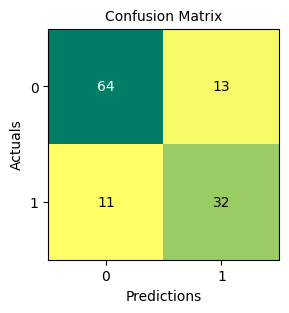

In [152]:
conf_stacking= confusion_matrix(y_test,y_pred_stacking)
fig, ax = plot_confusion_matrix(conf_mat=conf_stacking,figsize=(3,3), cmap=plt.cm.summer_r)

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [153]:
score_stacking = cross_val_score(stacking_clf ,x_train,y_train,cv=10,scoring='accuracy')
avg_scores_stacking = score_stacking.mean()

scores_stacking_test = cross_val_score(stacking_clf, x_test, y_test ,cv = 10, scoring = 'accuracy')
avg_scores_stacking_test = scores_stacking_test.mean()

print("Train score is:",format(avg_scores_stacking))
print("Test score is:",format(avg_scores_stacking_test))

[16:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-

[16:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "boosting_type", "class_weight", "num_leaves" } are not used.

[16:03:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-

# Feature selection(Multi Variable Mehtod): Using Tree Based Method

,Importance,Features
9,22,depression
4,19,cholestoral
7,19,heart rate
3,18,blood pressure
0,16,age
2,15,chest pain
1,12,sex
8,10,exercise induced
6,6,electrocardiographic
5,0,blood sugar


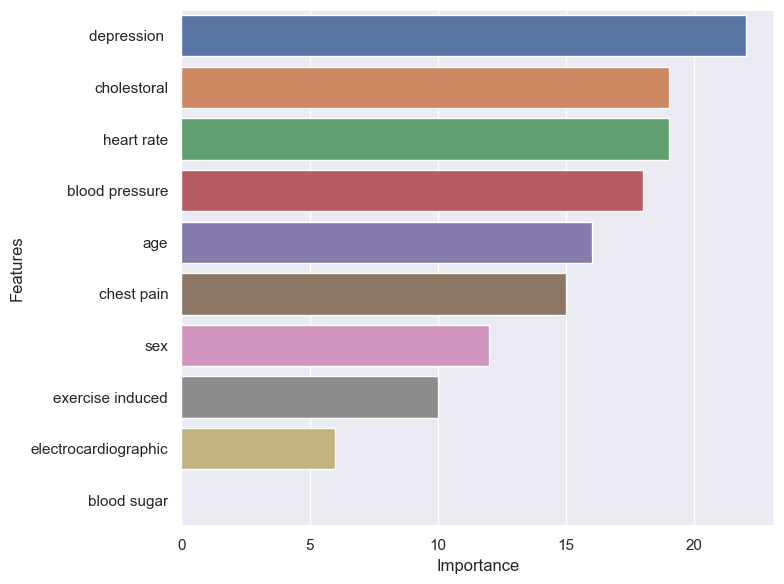

In [154]:
fearure_selection_lgbm = pd.DataFrame({'Importance':lgbm_best.feature_importances_,'Features':X.columns})
plt.figure(figsize=(8,6))
sns.set(font_scale = 1)
sns.barplot(x="Importance", y="Features", data=fearure_selection_lgbm.sort_values(by="Importance"
                                                                                 ,ascending=False))
plt.tight_layout()
fearure_selection_lgbm.sort_values(by = 'Importance',
                                  ascending=False)

# Permutaion Importance feature selection
### eli5

In [155]:
import eli5
from eli5.sklearn import permutation_importance

In [156]:
from eli5 import show_weights
show_weights(lgbm_best)

Weight,Feature
0.2807,chest_pain
0.1958,depression_
0.1462,exercise_induced
0.0961,heart_rate
0.0697,age
0.0606,sex
0.0577,blood_pressure
0.0559,cholestoral
0.0374,electrocardiographic
0,blood_sugar


# Pycaret (auto ML)

In [157]:
from pycaret.classification import *

In [158]:
sep = setup(df,target='c')

,Description,Value
0,Session id,3511
1,Target,c
2,Target type,Binary
3,Original data shape,"(596, 11)"
4,Transformed data shape,"(596, 11)"
5,Transformed train set shape,"(417, 11)"
6,Transformed test set shape,"(179, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [159]:
class_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8415,0.8912,0.8007,0.8122,0.8044,0.6713,0.6735,0.6730
ada,Ada Boost Classifier,0.8297,0.8875,0.7598,0.8143,0.7842,0.6440,0.6469,0.1440
ridge,Ridge Classifier,0.8295,0.0000,0.7477,0.8216,0.7805,0.6419,0.6459,0.0640
lda,Linear Discriminant Analysis,0.8295,0.9006,0.7477,0.8216,0.7805,0.6419,0.6459,0.0870
xgboost,Extreme Gradient Boosting,0.8249,0.8631,0.7542,0.8101,0.7786,0.6342,0.6381,0.7470
lr,Logistic Regression,0.8224,0.9004,0.7480,0.8063,0.7722,0.6276,0.6321,0.2240
catboost,CatBoost Classifier,0.8200,0.8885,0.7425,0.8084,0.7698,0.6228,0.6284,1.9130
qda,Quadratic Discriminant Analysis,0.8152,0.8716,0.7477,0.7892,0.7657,0.6137,0.6162,0.6770
et,Extra Trees Classifier,0.8152,0.8821,0.7425,0.7948,0.7655,0.6136,0.6167,0.2420
lightgbm,Light Gradient Boosting Machine,0.8129,0.8710,0.7304,0.7983,0.7606,0.6075,0.6113,0.1040


In [167]:
best_class_models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8415,0.8912,0.8007,0.8122,0.8044,0.6713,0.6735,0.1080
ada,Ada Boost Classifier,0.8297,0.8875,0.7598,0.8143,0.7842,0.6440,0.6469,0.1490
ridge,Ridge Classifier,0.8295,0.0000,0.7477,0.8216,0.7805,0.6419,0.6459,0.1080
lda,Linear Discriminant Analysis,0.8295,0.9006,0.7477,0.8216,0.7805,0.6419,0.6459,0.1210
xgboost,Extreme Gradient Boosting,0.8249,0.8631,0.7542,0.8101,0.7786,0.6342,0.6381,0.1630
lr,Logistic Regression,0.8224,0.9004,0.7480,0.8063,0.7722,0.6276,0.6321,0.1440
catboost,CatBoost Classifier,0.8200,0.8885,0.7425,0.8084,0.7698,0.6228,0.6284,0.1920
qda,Quadratic Discriminant Analysis,0.8152,0.8716,0.7477,0.7892,0.7657,0.6137,0.6162,0.1080
et,Extra Trees Classifier,0.8152,0.8821,0.7425,0.7948,0.7655,0.6136,0.6167,0.2020
lightgbm,Light Gradient Boosting Machine,0.8129,0.8710,0.7304,0.7983,0.7606,0.6075,0.6113,0.1310


In [161]:
best_class_models

[GaussianNB(priors=None, var_smoothing=1e-09),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=3511),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=3511, solver='auto',
                 tol=0.0001)]

# The 3 best Models with their HyperParameters:

#### GaussianNB(priors=None, var_smoothing=1e-09),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=3511),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=3511, solver='auto',
                 tol=0.0001)]

In [168]:
GaussianNB = create_model("nb")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8810,0.9583,0.8889,0.8421,0.8649,0.7586,0.7595
1,0.8333,0.8494,0.8235,0.7778,0.8000,0.6573,0.6581
2,0.8333,0.8918,0.8235,0.7778,0.8000,0.6573,0.6581
3,0.8810,0.8824,0.8235,0.8750,0.8485,0.7506,0.7515
4,0.8810,0.9600,0.8824,0.8333,0.8571,0.7552,0.7562
5,0.8571,0.9176,0.8235,0.8235,0.8235,0.7035,0.7035
6,0.8333,0.8353,0.7059,0.8571,0.7742,0.6441,0.6517
7,0.8049,0.8897,0.8235,0.7368,0.7778,0.6048,0.6078
8,0.7805,0.8137,0.6471,0.7857,0.7097,0.5358,0.5424


In [170]:
AdaBoostClassifier = create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8912,0.8333,0.8333,0.8333,0.7083,0.7083
1,0.8571,0.8635,0.7647,0.8667,0.8125,0.6978,0.7014
2,0.8095,0.8588,0.7059,0.8000,0.7500,0.5971,0.6002
3,0.8333,0.8635,0.7647,0.8125,0.7879,0.6508,0.6516
4,0.8810,0.9482,0.8824,0.8333,0.8571,0.7552,0.7562
5,0.7619,0.8753,0.7059,0.7059,0.7059,0.5059,0.5059
6,0.8095,0.8729,0.6471,0.8462,0.7333,0.5892,0.6021
7,0.8049,0.8799,0.7647,0.7647,0.7647,0.5980,0.5980
8,0.8293,0.8750,0.7059,0.8571,0.7742,0.6390,0.6468


In [177]:
RidgeClassifier = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.0000,0.8889,0.8889,0.8889,0.8056,0.8056
1,0.7857,0.0000,0.7059,0.7500,0.7273,0.5511,0.5518
2,0.8333,0.0000,0.7647,0.8125,0.7879,0.6508,0.6516
3,0.8095,0.0000,0.7059,0.8000,0.7500,0.5971,0.6002
4,0.8810,0.0000,0.8235,0.8750,0.8485,0.7506,0.7515
5,0.8810,0.0000,0.8235,0.8750,0.8485,0.7506,0.7515
6,0.8095,0.0000,0.6471,0.8462,0.7333,0.5892,0.6021
7,0.7805,0.0000,0.7647,0.7222,0.7429,0.5516,0.5523
8,0.7805,0.0000,0.5882,0.8333,0.6897,0.5275,0.5467


# Feature selectoin with auto ML

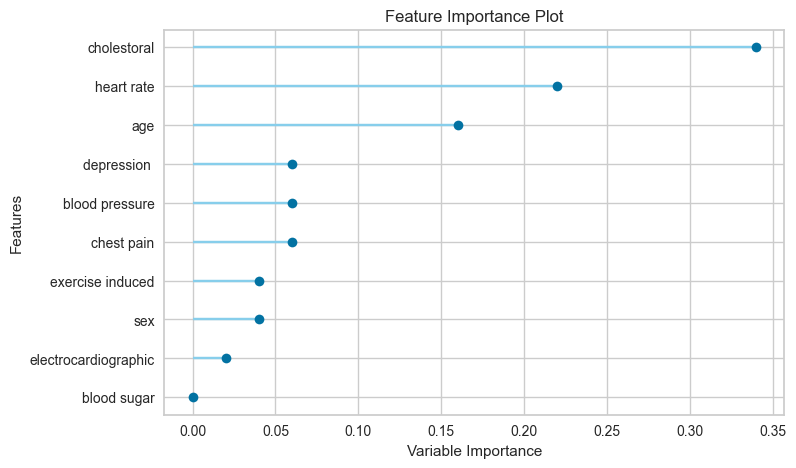

In [175]:
plot_model(AdaBoostClassifier,plot="feature")

# Ensemble Learning

In [178]:
ensemble_model_auto_ml = blend_models(
    estimator_list=[GaussianNB,AdaBoostClassifier,RidgeClassifier])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8810,0.0000,0.8889,0.8421,0.8649,0.7586,0.7595
1,0.7857,0.0000,0.7059,0.7500,0.7273,0.5511,0.5518
2,0.8333,0.0000,0.7647,0.8125,0.7879,0.6508,0.6516
3,0.8333,0.0000,0.7647,0.8125,0.7879,0.6508,0.6516
4,0.8810,0.0000,0.8824,0.8333,0.8571,0.7552,0.7562
5,0.8810,0.0000,0.8235,0.8750,0.8485,0.7506,0.7515
6,0.8095,0.0000,0.6471,0.8462,0.7333,0.5892,0.6021
7,0.7805,0.0000,0.7647,0.7222,0.7429,0.5516,0.5523
8,0.8049,0.0000,0.6471,0.8462,0.7333,0.5838,0.5968


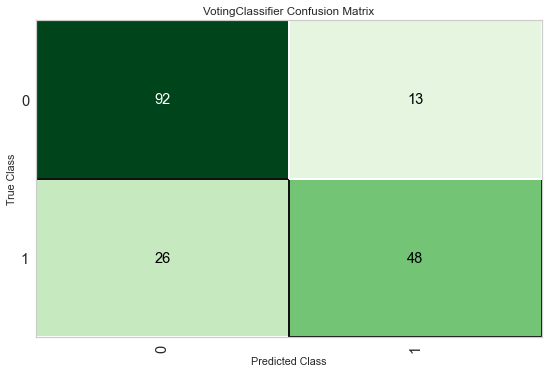

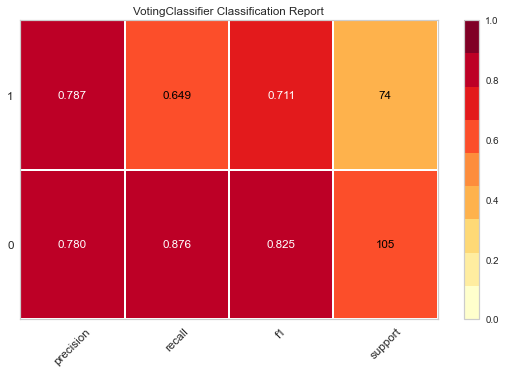

In [187]:
plot_model(estimator=ensemble_model_auto_ml,plot="confusion_matrix",scale=0.7)

plot_model(estimator=ensemble_model_auto_ml,plot="class_report",scale=0.7)

In [180]:
ensemble_model_auto_ml_best_alghorithm = blend_models(estimator_list=
                                                     [lgbm_best,xgboost_best,stacking_clf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9097,0.8333,0.7895,0.8108,0.6621,0.6628
1,0.7619,0.8400,0.6471,0.7333,0.6875,0.4964,0.4989
2,0.8571,0.8729,0.8824,0.7895,0.8333,0.7090,0.7124
3,0.8333,0.8518,0.7647,0.8125,0.7879,0.6508,0.6516
4,0.9048,0.9671,0.9412,0.8421,0.8889,0.8060,0.8098
5,0.8571,0.9294,0.8235,0.8235,0.8235,0.7035,0.7035
6,0.8571,0.8659,0.7059,0.9231,0.8000,0.6919,0.7070
7,0.7805,0.8382,0.7647,0.7222,0.7429,0.5516,0.5523
8,0.8780,0.8995,0.8235,0.8750,0.8485,0.7466,0.7476


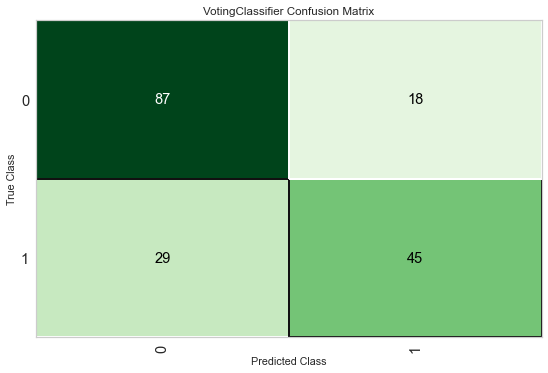

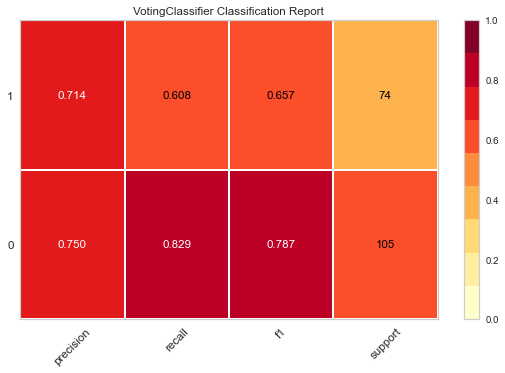

In [186]:
plot_model(estimator=ensemble_model_auto_ml_best_alghorithm,plot="confusion_matrix",scale=0.7)

plot_model(estimator=ensemble_model_auto_ml_best_alghorithm,plot="class_report",scale=0.7)